# OIL PRICE PREDICTION

# Objective:

Oil is a product that goes completely in a different direction for a single market event as the oil prices are rarely based on real-time data, instead, it is driven by externalities making our attempt to forecast it even more challenging As the economy will be highly affected by oil prices our model will help to understand the pattern in prices to help the customers and businesses to make smart decisions.

### Analysis on oil price influence factors

The following are main factors affecting the oil prices:


1.)Changes in the value of the U.S. dollar


2.)Changes in the policies of the Organization of Petroleum Exporting Countries (OPEC)


3.)Changes in the levels of oil production and inventory


4.)The health of the global economy


5.)The implementation (or collapse) of international agreements


reference link:"https://www.investopedia.com/articles/investing/102215/4-reasons-why-price-crude-oil-dropped.asp"

### Importing Libraries

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
import warnings
warnings.filterwarnings("ignore")

### Importing Data Set

In [5]:
OILDATA=pd.read_csv("crude-oil-price.csv")

In [6]:
OILDATA.head(20)

date  price  percentChange  change
0   1983-03-30T00:00:00  29.27            NaN     NaN
1   1983-04-04T00:00:00  30.63       4.646396    1.36
2   1983-05-02T00:00:00  30.25      -1.240614   -0.38
3   1983-06-01T00:00:00  31.38       3.735537    1.13
4   1983-07-01T00:00:00  32.00       1.975781    0.62
5   1983-08-01T00:00:00  31.59      -1.281250   -0.41
6   1983-09-01T00:00:00  30.36      -3.893637   -1.23
7   1983-10-03T00:00:00  30.37       0.032938    0.01
8   1983-11-01T00:00:00  29.23      -3.753704   -1.14
9   1983-12-01T00:00:00  29.60       1.265823    0.37
10  1984-01-03T00:00:00  29.98       1.283784    0.38
11  1984-02-01T00:00:00  30.55       1.901268    0.57
12  1984-03-01T00:00:00  30.85       0.981997    0.30
13  1984-04-02T00:00:00  30.26      -1.912480   -0.59
14  1984-05-01T00:00:00  30.83       1.883675    0.57
15  1984-06-01T00:00:00  29.75      -3.503081   -1.08
16  1984-07-02T00:00:00  27.60      -7.226891   -2.15
17  1984-08-01T00:00:00  29.23       5.905797    1.63
18  1984-09-04T00:00:00  29.66       1.471091    0.43
19  1984-10-01T00:00:00  28.46      -4.045853   -1.20

### EDA

In [7]:
OILDATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           469 non-null    object 
 1   price          469 non-null    float64
 2   percentChange  468 non-null    float64
 3   change         468 non-null    float64
dtypes: float64(3), object(1)
memory usage: 14.8+ KB


In [8]:
OILDATA.describe()

price  percentChange      change
count  469.000000     468.000000  468.000000
mean    44.071641       0.838667    0.171068
std     28.376748      10.685748    4.954575
min     10.420000     -54.244861  -32.830000
25%     20.270000      -5.040127   -1.632500
50%     30.830000       0.956201    0.280000
75%     63.580000       6.511568    2.317500
max    140.000000      88.375796   16.650000

price in USD/BBL

### Formatting Date

In [9]:
#OILDATA['date']=pd.to_datetime(OILDATA.date,format="%Y-%m-%d")

In [10]:
OILDATA['date']=pd.to_datetime(OILDATA.date,format="%Y-%m-%dT%H:%M:%S")

In [11]:
OILDATA

date   price  percentChange  change
0   1983-03-30   29.27            NaN     NaN
1   1983-04-04   30.63       4.646396    1.36
2   1983-05-02   30.25      -1.240614   -0.38
3   1983-06-01   31.38       3.735537    1.13
4   1983-07-01   32.00       1.975781    0.62
..         ...     ...            ...     ...
464 2021-11-01   65.85     -19.479090  -15.93
465 2021-12-01   74.88      13.712984    9.03
466 2022-01-03   86.49      15.504808   11.61
467 2022-02-01   95.72      10.671754    9.23
468 2022-03-01  109.33      14.218554   13.61

[469 rows x 4 columns]

In [12]:
OILDATA['Month']=OILDATA.date.dt.strftime("%b")

In [13]:
OILDATA['Year']=OILDATA.date.dt.strftime("%Y")

In [14]:
OILDATA['Day']=OILDATA.date.dt.strftime("%d")

In [15]:
OILDATA['Time']=OILDATA.date.dt.strftime("%H:%M:%S")

In [16]:
OILDATA.nunique()

date             469
price            444
percentChange    468
change           381
Month             12
Year              40
Day                6
Time               1
dtype: int64

In [17]:
OILDATA[OILDATA.duplicated()]

Empty DataFrame
Columns: [date, price, percentChange, change, Month, Year, Day, Time]
Index: []

In [18]:
OILDATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           469 non-null    datetime64[ns]
 1   price          469 non-null    float64       
 2   percentChange  468 non-null    float64       
 3   change         468 non-null    float64       
 4   Month          469 non-null    object        
 5   Year           469 non-null    object        
 6   Day            469 non-null    object        
 7   Time           469 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 29.4+ KB


In [19]:
OILDATA

date   price  percentChange  change Month  Year Day      Time
0   1983-03-30   29.27            NaN     NaN   Mar  1983  30  00:00:00
1   1983-04-04   30.63       4.646396    1.36   Apr  1983  04  00:00:00
2   1983-05-02   30.25      -1.240614   -0.38   May  1983  02  00:00:00
3   1983-06-01   31.38       3.735537    1.13   Jun  1983  01  00:00:00
4   1983-07-01   32.00       1.975781    0.62   Jul  1983  01  00:00:00
..         ...     ...            ...     ...   ...   ...  ..       ...
464 2021-11-01   65.85     -19.479090  -15.93   Nov  2021  01  00:00:00
465 2021-12-01   74.88      13.712984    9.03   Dec  2021  01  00:00:00
466 2022-01-03   86.49      15.504808   11.61   Jan  2022  03  00:00:00
467 2022-02-01   95.72      10.671754    9.23   Feb  2022  01  00:00:00
468 2022-03-01  109.33      14.218554   13.61   Mar  2022  01  00:00:00

[469 rows x 8 columns]

### VISUALIZATION

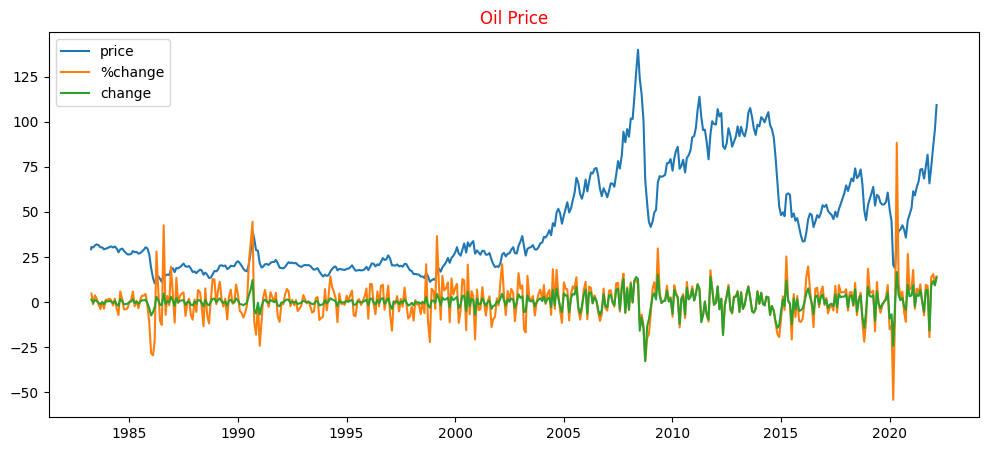

In [20]:
plt.figure(figsize=(12,5))
plt.plot(OILDATA["date"],OILDATA["price"],label="price")
plt.plot(OILDATA["date"],OILDATA["percentChange"],label="%change")
plt.plot(OILDATA["date"],OILDATA["change"],label="change")
plt.title("Oil Price",color='r')
plt.legend(loc="best")

percentChange change columns are not requires for our forcasting so letus drop that after some time

#### Line plot

<Axes: title={'center': 'Oil price year wise'}, xlabel='Year', ylabel='price'>

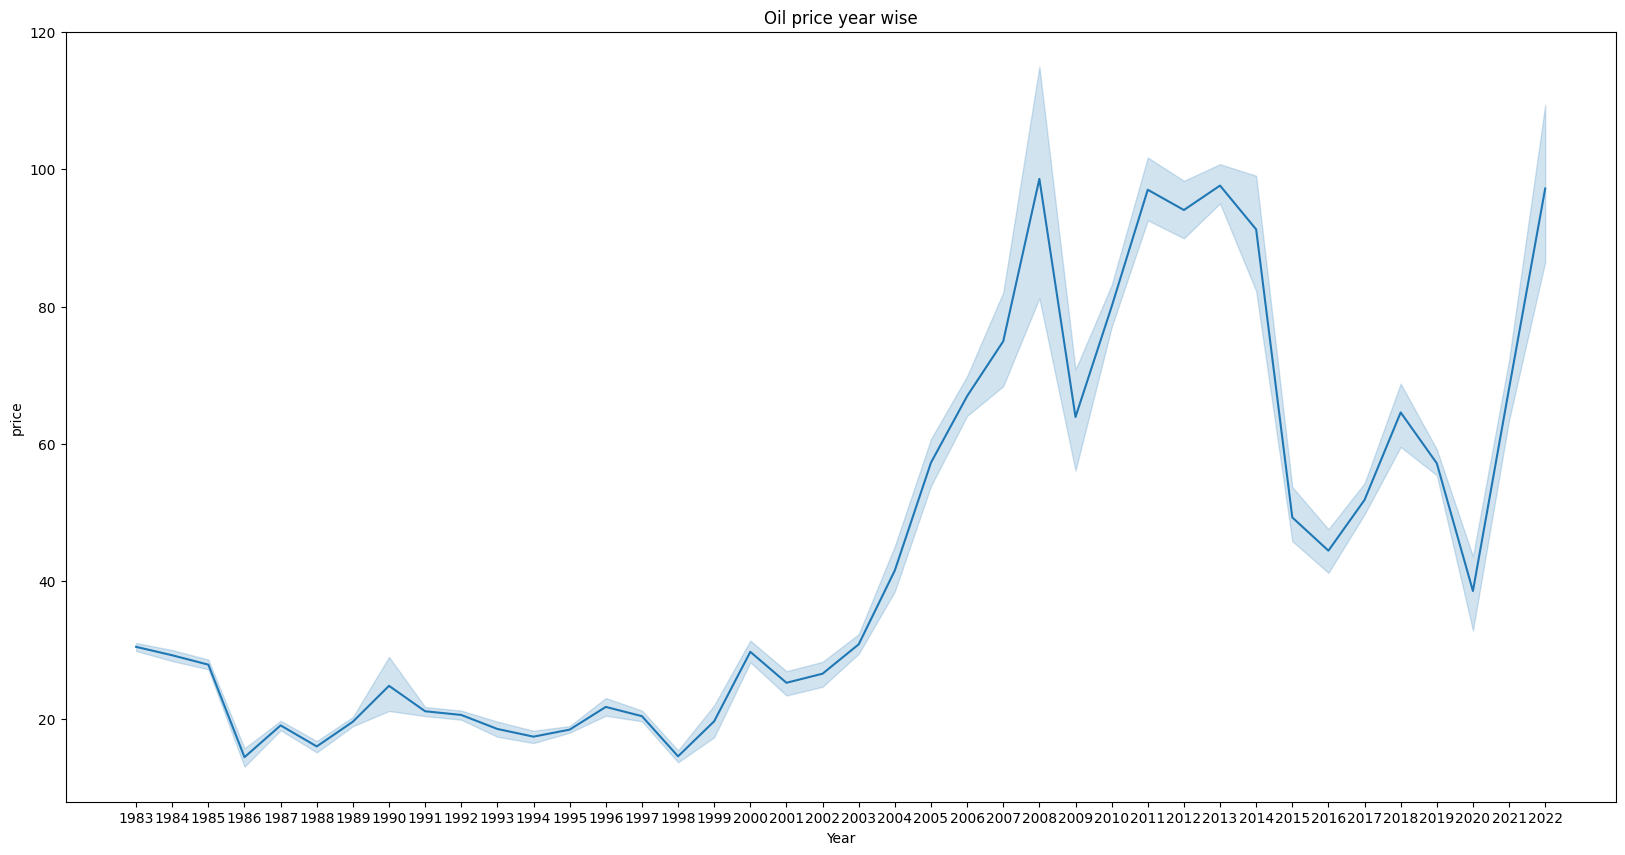

In [21]:
plt.figure(figsize=(20,10))
plt.title("Oil price year wise")
sns.lineplot(x=OILDATA["Year"],y=OILDATA["price"])

<Axes: title={'center': 'Whole Data set Visualization'}, xlabel='Month', ylabel='Year'>

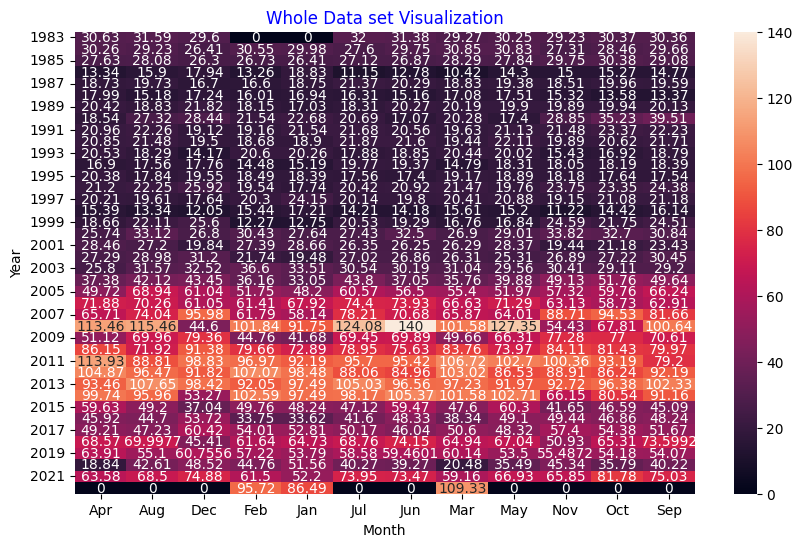

In [22]:
plt.figure(figsize=(10,6))
plt.title("Whole Data set Visualization",c="b")
heatmap = pd.pivot_table(data=OILDATA, values="price", index="Year", columns="Month", aggfunc="mean",fill_value=0)
sns.heatmap(heatmap,annot=True,fmt="g")

### Quarter wise

In [23]:
OILDATA

date   price  percentChange  change Month  Year Day      Time
0   1983-03-30   29.27            NaN     NaN   Mar  1983  30  00:00:00
1   1983-04-04   30.63       4.646396    1.36   Apr  1983  04  00:00:00
2   1983-05-02   30.25      -1.240614   -0.38   May  1983  02  00:00:00
3   1983-06-01   31.38       3.735537    1.13   Jun  1983  01  00:00:00
4   1983-07-01   32.00       1.975781    0.62   Jul  1983  01  00:00:00
..         ...     ...            ...     ...   ...   ...  ..       ...
464 2021-11-01   65.85     -19.479090  -15.93   Nov  2021  01  00:00:00
465 2021-12-01   74.88      13.712984    9.03   Dec  2021  01  00:00:00
466 2022-01-03   86.49      15.504808   11.61   Jan  2022  03  00:00:00
467 2022-02-01   95.72      10.671754    9.23   Feb  2022  01  00:00:00
468 2022-03-01  109.33      14.218554   13.61   Mar  2022  01  00:00:00

[469 rows x 8 columns]

In [24]:
OILDATA.set_index("date", inplace=True)

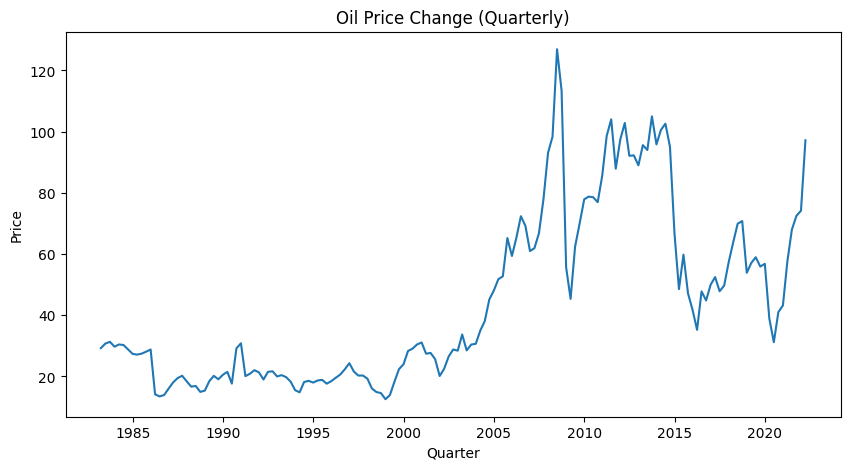

In [25]:
# Resample the data by quarter
quarterly_data = OILDATA.resample("Q").mean()

# Plotting quarter-wise changes
plt.figure(figsize=(10, 5))
plt.title("Oil Price Change (Quarterly)")
sns.lineplot(x=quarterly_data.index, y=quarterly_data["price"])
plt.xlabel("Quarter")
plt.ylabel("Price")

plt.show()

In [26]:
quarterly_data

price  percentChange     change
date                                           
1983-03-31  29.270000            NaN        NaN
1983-06-30  30.753333       2.380440   0.703333
1983-09-30  31.316667      -1.066369  -0.340000
1983-12-31  29.733333      -0.818314  -0.253333
1984-03-31  30.460000       1.389016   0.416667
...               ...            ...        ...
2021-03-31  57.620000       7.198572   3.546667
2021-06-30  67.993333       7.503873   4.770000
2021-09-30  72.493333       0.938777   0.520000
2021-12-31  74.170000       1.076765  -0.050000
2022-03-31  97.180000      13.465039  11.483333

[157 rows x 3 columns]

### Decade Wise

Text(0, 0.5, 'Price')

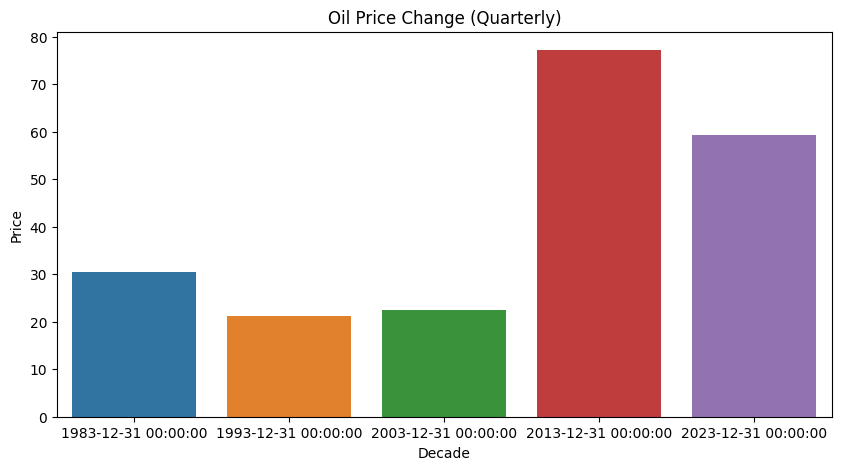

In [27]:
decade_data=OILDATA.resample("10Y").mean()

# Plotting quarter-wise changes
plt.figure(figsize=(10, 5))
plt.title("Oil Price Change (Quarterly)")
sns.barplot(x=decade_data.index, y=decade_data["price"])
plt.xlabel("Decade")
plt.ylabel("Price")


In [28]:
decade_data

price  percentChange    change
date                                          
1983-12-31  30.468000       0.165252  0.036667
1993-12-31  21.107000      -0.074399 -0.128583
2003-12-31  22.447500       1.108046  0.152917
2013-12-31  77.194083       1.332668  0.549167
2023-12-31  59.344341       1.081325  0.110202

#### Boxplot

<Axes: xlabel='Month', ylabel='price'>

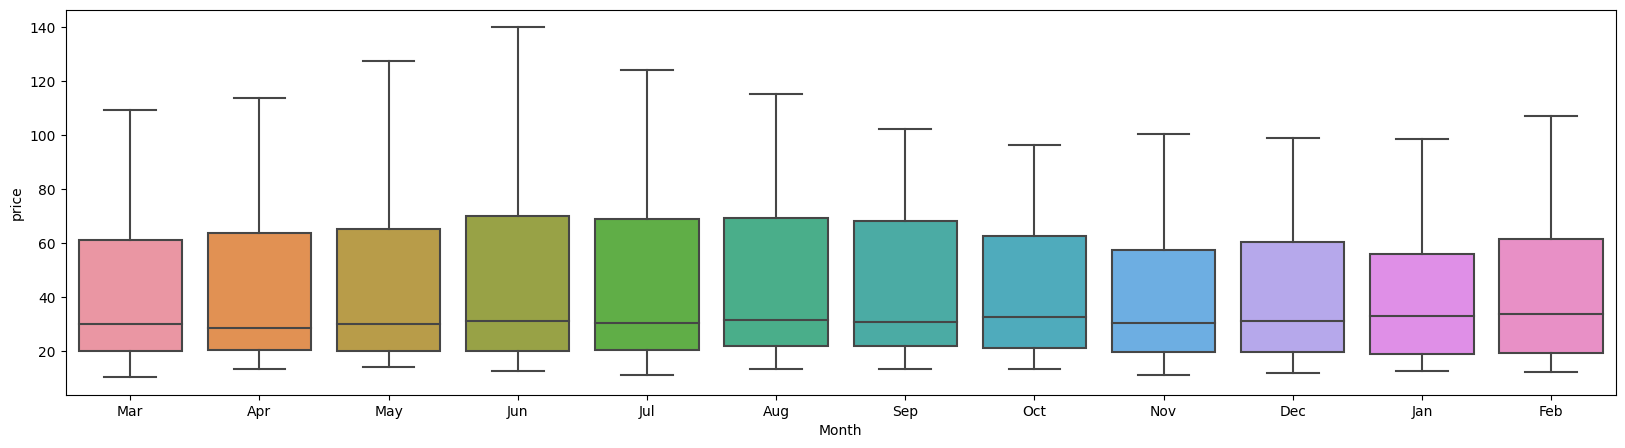

In [29]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Month',y='price',data=OILDATA)

<Axes: xlabel='Year', ylabel='price'>

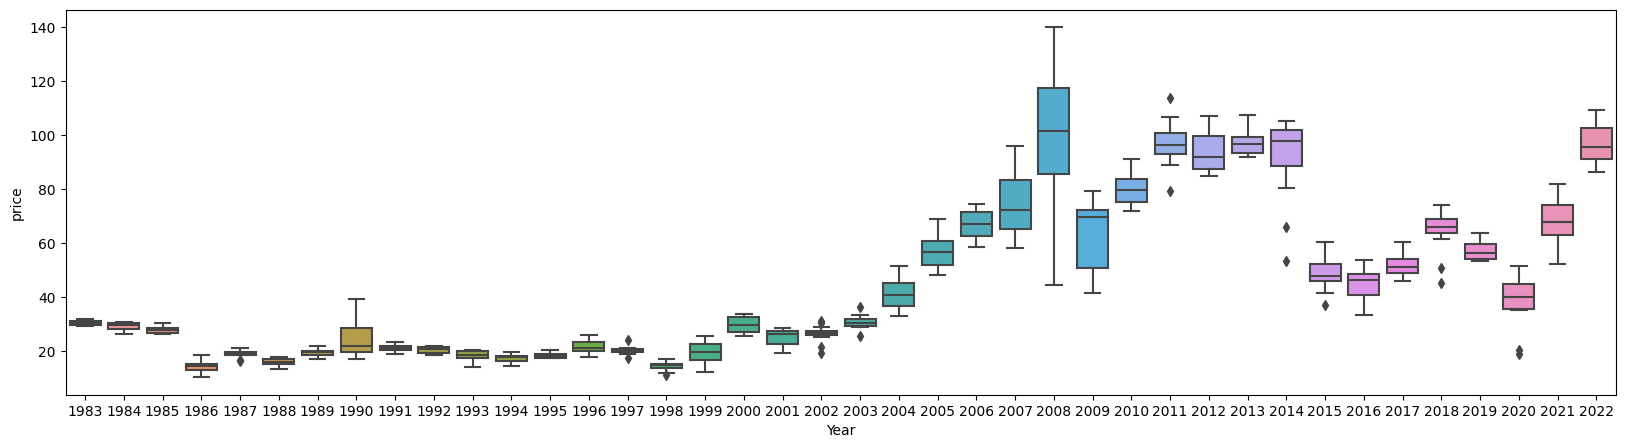

In [30]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Year',y='price',data=OILDATA)

<Axes: xlabel='Day', ylabel='price'>

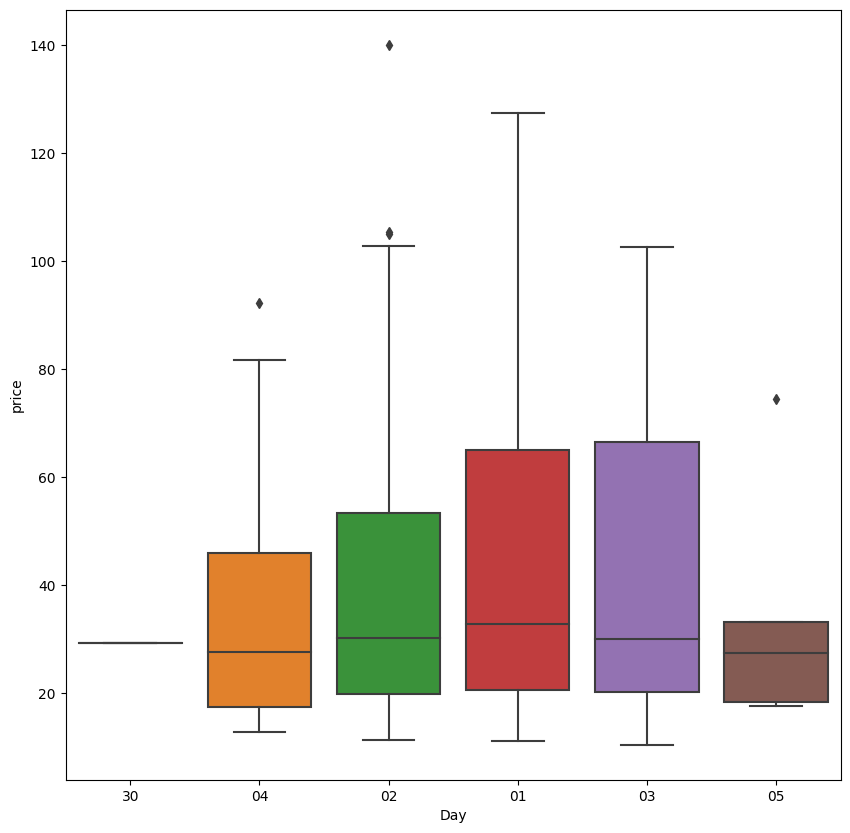

In [31]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Day',y='price',data=OILDATA)

From above plot we can understand that after 2000 a high in oil price which can relate to the US invation on Middle east and Economic crisis in 2008 made a sudden drop after recession a large high got and from 2015 onwards it got reduced.But due to Covid it got some fluctuation and again reovered to high values still its increasing which have the infulence of Russia-Ukrain War and Global crude oil price Hike.

The year 2015 was a perfect storm for oil prices.
The dollar was strong. Inventories were huge. The economy was weak. And production was growing.
All of these factors drove the price of crude oil to less than $40 per barrel.

<Axes: xlabel='Time', ylabel='price'>

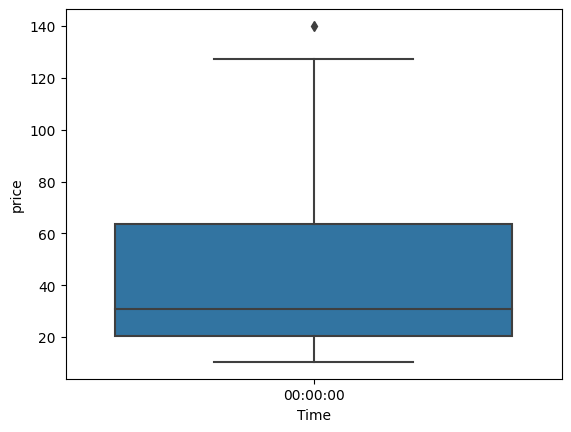

In [32]:
sns.boxplot(x='Time',y='price',data=OILDATA)

### Skewness

Text(0.5, 1.0, 'price')

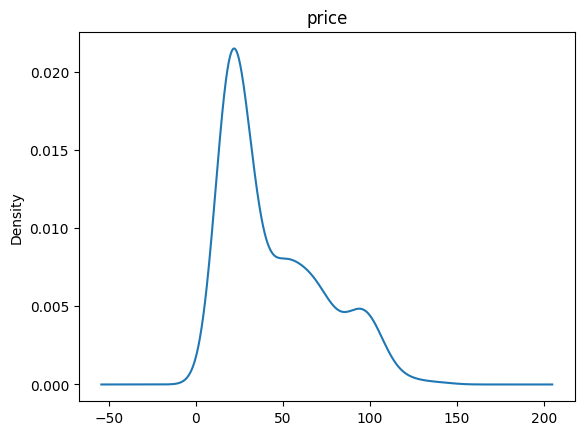

In [33]:
OILDATA['price'].plot(kind='kde')
plt.title("price")

<Axes: ylabel='Density'>

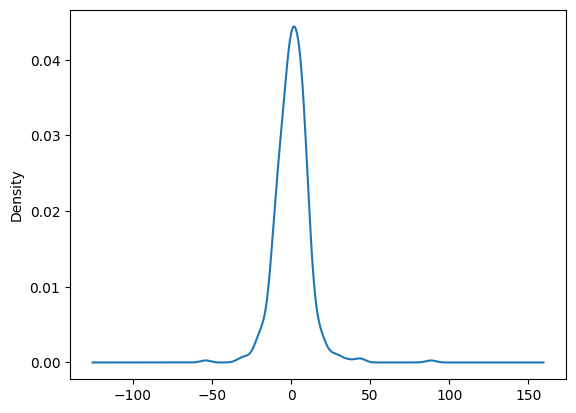

In [34]:
OILDATA["percentChange"].plot(kind='kde')

<Axes: ylabel='Density'>

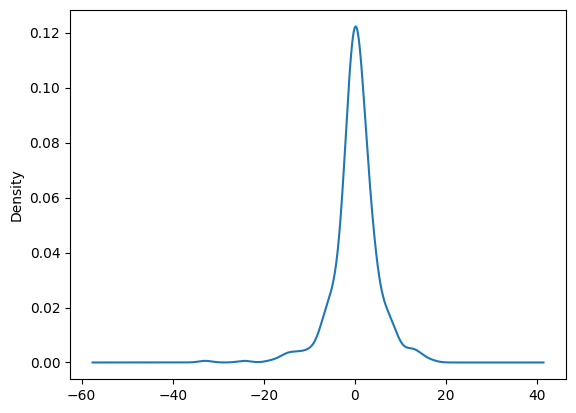

In [35]:
OILDATA['change'].plot(kind='kde')

 It refers to a distribution that has a long tail on the right side and is skewed towards higher values. In a right-skewed distribution, the majority of the data points are concentrated towards the lower end of the distribution, while a few extreme values are present on the right side, pulling the mean or median in that direction. The tail on the right side indicates that there are outliers or high values that occur less frequently.

In [36]:
import statsmodels.api as sm
import pylab as py

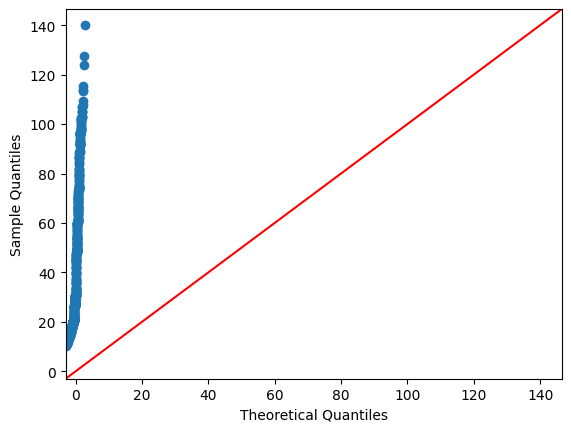

In [37]:
sm.qqplot(OILDATA["price"],line='45')
py.show()

In [38]:
OILDATA["price"].describe()

count    469.000000
mean      44.071641
std       28.376748
min       10.420000
25%       20.270000
50%       30.830000
75%       63.580000
max      140.000000
Name: price, dtype: float64

In [39]:
OILDATA["price"].median()

30.83

### Out liers Detection

In [40]:
median=OILDATA["price"].median()

Text(0.8, 30.83, 'Median:30.83')

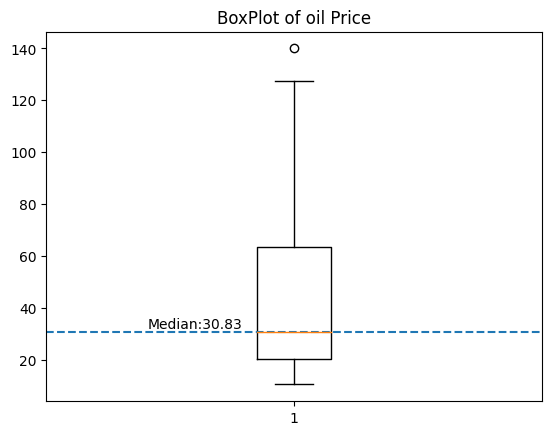

In [41]:
plt.boxplot("price",data=OILDATA)
plt.title("BoxPlot of oil Price")
plt.axhline(y=OILDATA["price"].median(),linestyle='--')
plt.text(0.8,median,f"Median:{median}",ha='center',va='bottom')

In forecasting, it is generally recommended to evaluate the presence of outliers and their potential impact on the model. Outliers can significantly affect the accuracy of the forecast by skewing the underlying patterns and relationships.
So since its avisible to not remove outliers we can keep these out liers as it is.

We will consider only price value only because we have to predict price value only.

So  from our data set we will keep date and price only rest all features we will delete.

In [42]:
Finaldf=OILDATA.drop(columns=["percentChange","change","Month","Year","Day","Time"])

In [43]:
Finaldf

price
date              
1983-03-30   29.27
1983-04-04   30.63
1983-05-02   30.25
1983-06-01   31.38
1983-07-01   32.00
...            ...
2021-11-01   65.85
2021-12-01   74.88
2022-01-03   86.49
2022-02-01   95.72
2022-03-01  109.33

[469 rows x 1 columns]

### Splitting the data into train and test

In [44]:
Train=Finaldf.head(400)
Test=Finaldf.tail(69)

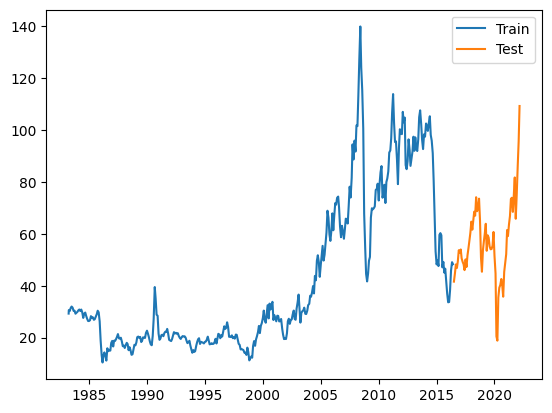

In [45]:
#plt.title("Oil Price",c='r')
plt.plot(Train.index,Train["price"],label="Train")
plt.plot(Test.index,Test["price"],label="Test")
plt.legend(loc="best")

In [46]:
Train

price
date             
1983-03-30  29.27
1983-04-04  30.63
1983-05-02  30.25
1983-06-01  31.38
1983-07-01  32.00
...           ...
2016-02-01  33.75
2016-03-01  38.34
2016-04-01  45.92
2016-05-02  49.10
2016-06-01  48.33

[400 rows x 1 columns]

In [47]:
Test

price
date              
2016-07-01   41.60
2016-08-01   44.70
2016-09-01   48.24
2016-10-03   46.86
2016-11-01   49.44
...            ...
2021-11-01   65.85
2021-12-01   74.88
2022-01-03   86.49
2022-02-01   95.72
2022-03-01  109.33

[69 rows x 1 columns]

### Lag Plot

Applying a moving average before the lag plot can help reveal underlying trends and patterns, while creating a lag plot before the moving average allows for a closer examination of the autocorrelation structure in the raw data.

<Axes: xlabel='y(t)', ylabel='y(t + 4)'>

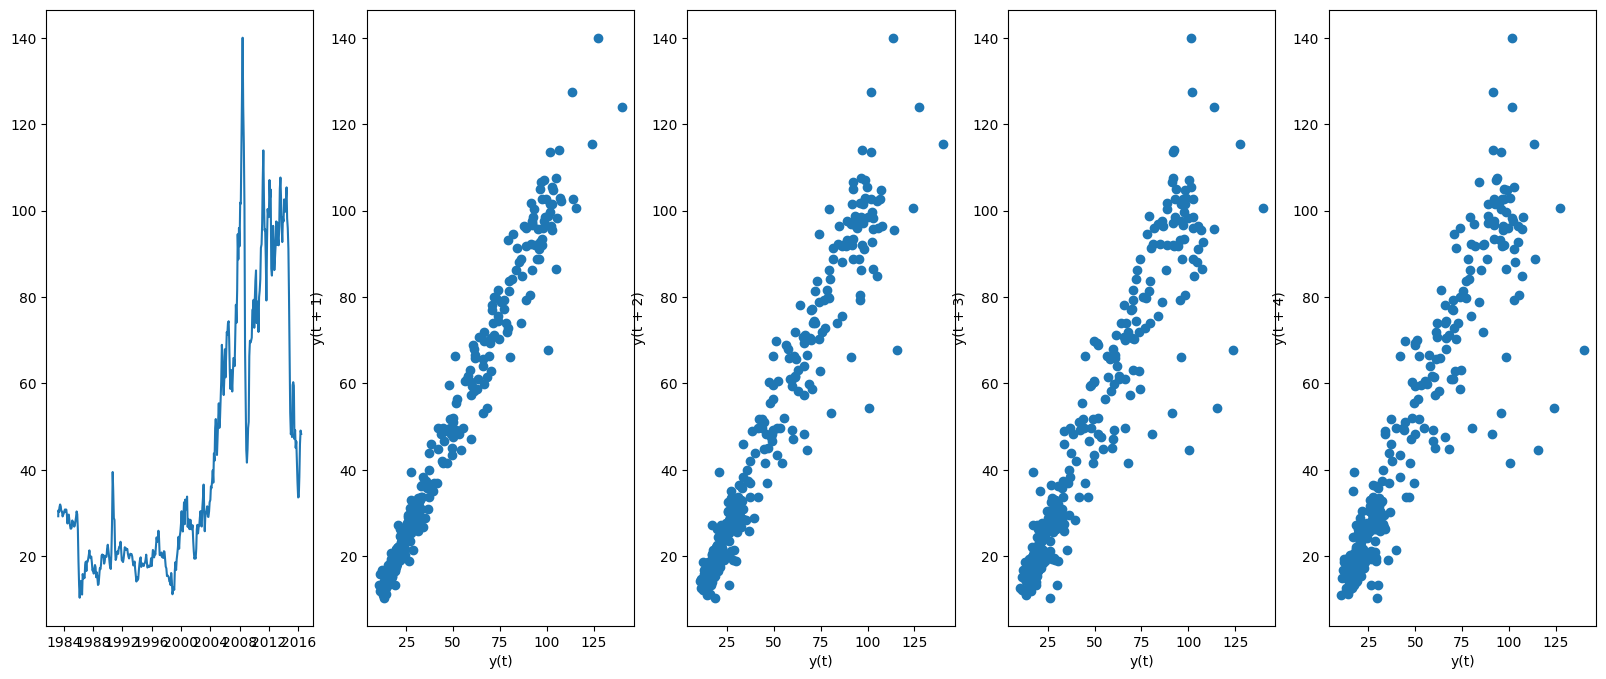

In [48]:
fig,axs=plt.subplots(1,5,figsize=(20,8))
axs[0].plot(Train.index,Train["price"])
pd.plotting.lag_plot(Train["price"],lag=1,ax=axs[1])
pd.plotting.lag_plot(Train["price"],lag=2,ax=axs[2])
pd.plotting.lag_plot(Train["price"],lag=3,ax=axs[3])
pd.plotting.lag_plot(Train["price"],lag=4,ax=axs[4])

Y(t-1) means lag=1 shows more correlation than other lag with Y(t) where Y(t) is last price and Y(t-1) is 1 date previous.

### ACF and PACF

In [49]:
import statsmodels.graphics.tsaplots as tsa_plots

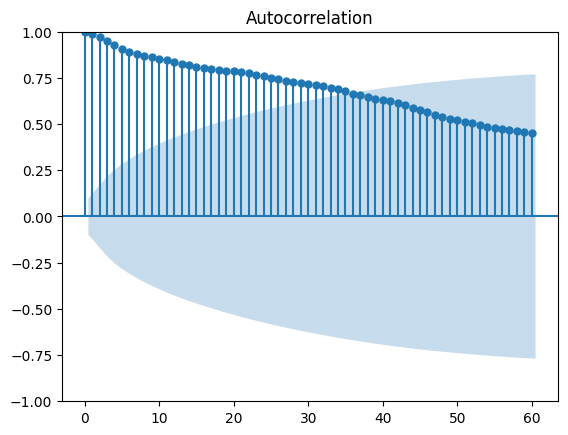

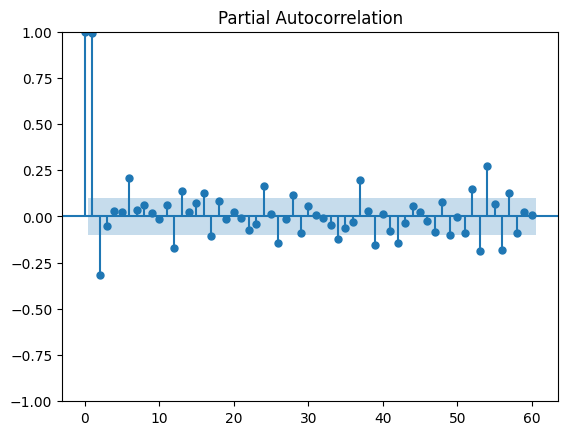

In [50]:
tsa_plots.plot_acf(Train.price,lags=60)
tsa_plots.plot_pacf(Train.price,lags=60)
plt.show()

from above ACF plot upto 35-40 lags are above +2SE and its highly direct and indirect correlated.But when we consider for PACF we can see that first 2 that lag one and 2 are above +2SE but lag 3 nearly -2SE so which shows very less correlation compared to first two so passimoniuosly we can select ACF AS 36 lag and PACF 2 Which will be use full for AR and MA building time.

### Model Building

Naive Forecasting: Start with a simple baseline model, such as a naive forecast. Naive forecasting assumes that future values will be the same as the most recent observation. Calculate the accuracy metrics (e.g., mean absolute error, root mean squared error) to establish a benchmark for evaluating other models.

Moving Average (MA) Models: MA models capture the dependence between an observation and a residual error from a moving average of previous observations. They are denoted as MA(q), where 'q' represents the order of the model. Use the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots to determine the appropriate order of the MA model.

Autoregressive (AR) Models: AR models assume that future values are linearly dependent on previous observations. They are denoted as AR(p), where 'p' represents the order of the model. Analyze the PACF plot to determine the appropriate order of the AR model.

Autoregressive Moving Average (ARMA) Models: ARMA models combine both AR and MA components. They are denoted as ARMA(p, q), where 'p' represents the order of the AR model and 'q' represents the order of the MA model. Determine the appropriate orders of both components using the ACF and PACF plots.

Autoregressive Integrated Moving Average (ARIMA) Models: ARIMA models extend ARMA models by incorporating differencing to remove trends or seasonality in the data. They are denoted as ARIMA(p, d, q), where 'd' represents the degree of differencing. Use the differencing process to make the data stationary, then determine the appropriate orders of the AR, I (differencing), and MA components using the ACF and PACF plots.

Seasonal ARIMA (SARIMA) Models: SARIMA models are used when the data exhibits seasonal patterns. They incorporate seasonal differencing and seasonal AR and MA components. SARIMA models are denoted as SARIMA(p, d, q)(P, D, Q, m), where the capital letters represent the seasonal orders and 'm' is the length of the seasonal cycle.

Exponential Smoothing (ETS) Models: ETS models capture the underlying patterns in the data by assigning exponentially decreasing weights to previous observations. They are available in different variations, including Simple Exponential Smoothing, Holt's Linear Exponential Smoothing, and Holt-Winters' Seasonal Exponential Smoothing. Choose the appropriate ETS model based on the presence of trend and seasonality in the data.

Prophet: Prophet is a forecasting model developed by Facebook that incorporates seasonality, trends, and holiday effects. It is a flexible model that can handle various time series patterns. Prophet uses a decomposable time series model with three main components: trend, seasonality, and holidays.

Machine Learning Models: Consider using machine learning algorithms, such as Random Forest, Gradient Boosting

(Youtube:"https://www.youtube.com/watch?v=FPM6it4v8MY&t=7736s")

### Time Series Decomposition

To understand trend and seasonality let us decompose and cross verify inner components of the above graph as a prerequisite for our datamodeling

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [52]:
import numpy as np

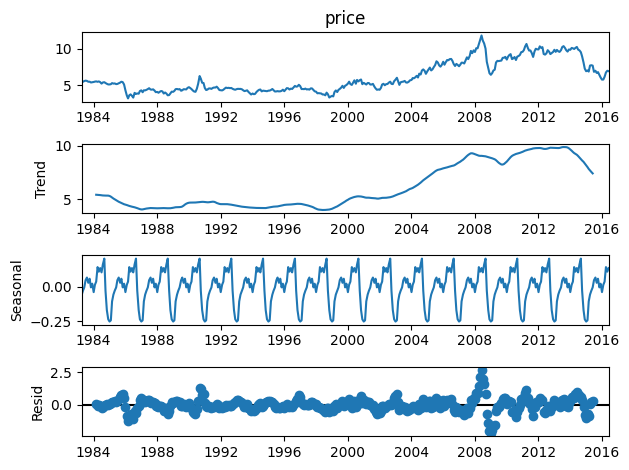

In [53]:
decomposed_data=seasonal_decompose(np.sqrt(Train["price"]),period=24)
decomposed_data.plot()
plt.show()

Taken information from ExcelR ppt on forcasting.

for model building concept we can refer following website

https://www.hindawi.com/journals/mpe/2021/5589717/

Trend is upwardtrend

## Naive Model

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [55]:
last_observed_value = Train['price'].iloc[-1]
Test['naive_forecast'] = last_observed_value

In [56]:
for i in range(1,len(Test["price"])):
    Test['naive_forecast']=Test["price"].iloc[i-1]

In [57]:
Naivemae = mean_absolute_error(Test['price'], Test['naive_forecast'])
Naive_rmse = mean_squared_error(Test['price'], Test['naive_forecast'], squared=False)


In [58]:
Naive_mse=np.mean( Test['naive_forecast']-Test['price'])

In [59]:
Naive_mse

38.62420579710145

In [60]:
Test['naive_forecast']

date
2016-07-01    95.72
2016-08-01    95.72
2016-09-01    95.72
2016-10-03    95.72
2016-11-01    95.72
              ...  
2021-11-01    95.72
2021-12-01    95.72
2022-01-03    95.72
2022-02-01    95.72
2022-03-01    95.72
Name: naive_forecast, Length: 69, dtype: float64

In [61]:
Naive_rmse=np.sqrt(Naive_mse)

In [62]:
Naive_rmse

6.214837551947875

In [63]:
Naivemae

39.01869855072464

In [64]:
Naive_mse

38.62420579710145

Here's a comparison between MAE and RMSE:

Mean Absolute Error (MAE): MAE measures the average absolute difference between the forecasted values and the actual values. It provides a measure of the magnitude of errors without considering their direction. MAE is useful when all errors are considered equally important, and you want to understand the average absolute deviation of the forecast from the actual values.

Root Mean Squared Error (RMSE): RMSE is the square root of the average of the squared differences between the forecasted values and the actual values. RMSE gives more weight to large errors because of the squared term, and it is useful when you want to penalize larger deviations between the forecast and the actual values. RMSE is particularly sensitive to outliers or large errors in the data.

In general, if you want to have a metric that is easily interpretable and represents the average magnitude of errors, MAE is a good choice. On the other hand, if you want to emphasize the impact of larger errors and want to penalize them more, RMSE is a suitable option.

Ultimately, the choice between MAE and RMSE depends on the specific context of your forecasting problem and the importance you assign to different types of errors. It's also a good practice to consider both metrics and compare them to gain a more comprehensive understanding of the model's performance.

Next we are going for AR,MA ARMA models which works only on stationary data which means no trend and no seasonality.But here we have trend and seasonality so we need to remove it.

1.)To check seasonality Go for ADF test

2.)AR p value or order value check for pacf plot

3.)MA q value ororder value check for Acf plot

4.)To comfirm perfect model order for ar and ma undergo with LLR test which internally perform hypothesis test and shows which order our model shows better performance.

5.)ARIMA model order p,q which can take from AR and MA models and finalize order (p,q) with LLR test as previous steps

6.)Build model find MSE and RMSE.

### Scaling The Data

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler=StandardScaler()

In [67]:
OILDATA

price  percentChange  change Month  Year Day      Time
date                                                               
1983-03-30   29.27            NaN     NaN   Mar  1983  30  00:00:00
1983-04-04   30.63       4.646396    1.36   Apr  1983  04  00:00:00
1983-05-02   30.25      -1.240614   -0.38   May  1983  02  00:00:00
1983-06-01   31.38       3.735537    1.13   Jun  1983  01  00:00:00
1983-07-01   32.00       1.975781    0.62   Jul  1983  01  00:00:00
...            ...            ...     ...   ...   ...  ..       ...
2021-11-01   65.85     -19.479090  -15.93   Nov  2021  01  00:00:00
2021-12-01   74.88      13.712984    9.03   Dec  2021  01  00:00:00
2022-01-03   86.49      15.504808   11.61   Jan  2022  03  00:00:00
2022-02-01   95.72      10.671754    9.23   Feb  2022  01  00:00:00
2022-03-01  109.33      14.218554   13.61   Mar  2022  01  00:00:00

[469 rows x 7 columns]

In [68]:
price_data=OILDATA["price"].values.reshape(-1, 1)

In [69]:
scale=scaler.fit_transform(price_data)

In [70]:
scale

array([[-0.5221686 ],
       [-0.47419086],
       [-0.4875964 ],
       [-0.44773255],
       [-0.42586034],
       [-0.44032422],
       [-0.48371585],
       [-0.48336307],
       [-0.52357971],
       [-0.51052694],
       [-0.49712139],
       [-0.47701308],
       [-0.46642975],
       [-0.48724363],
       [-0.46713531],
       [-0.50523528],
       [-0.58108244],
       [-0.52357971],
       [-0.50841027],
       [-0.55074357],
       [-0.59131299],
       [-0.62306296],
       [-0.62306296],
       [-0.61177408],
       [-0.55674079],
       [-0.58002411],
       [-0.57261578],
       [-0.6068352 ],
       [-0.59801576],
       [-0.56414912],
       [-0.52887137],
       [-0.4830103 ],
       [-0.50523528],
       [-0.62694351],
       [-0.8904683 ],
       [-1.08696537],
       [-1.18715418],
       [-1.08414315],
       [-1.05027651],
       [-1.10389869],
       [-1.16140142],
       [-0.99383211],
       [-1.03369597],
       [-1.01605709],
       [-1.02558208],
       [-0

Text(0.5, 1.0, 'After Standardising Data')

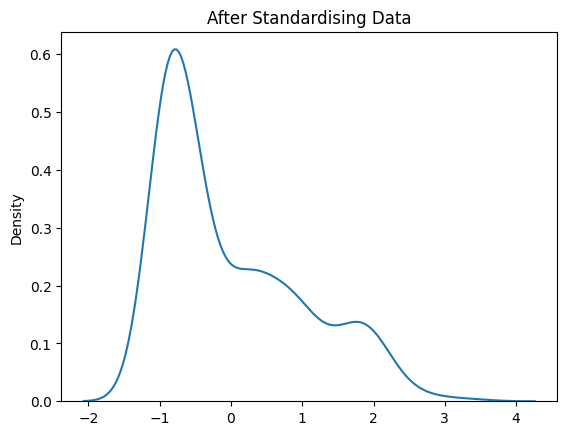

In [71]:
sns.kdeplot(data=scale.flatten())
plt.title("After Standardising Data")

Still skewness not reduced so we will go with log and other transformations so before that we will go and check with ADF test the stationarity then we will proceed further

### ADF Test

#### Test for stationarity

In [72]:
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts

In [73]:
sts.adfuller(Train["price"])

(-1.702764592758081,
 0.429688641382888,
 5,
 394,
 {'1%': -3.4470566389664703,
  '5%': -2.8689037160476016,
  '10%': -2.570692663557422},
 2234.4971083856167)

In [74]:
def adf_test(Data):
  result=sts.adfuller(Data)
  ''' perform Augmented Dickey Fuller Test on Given Data Set'''
  labels=["ADF test statistic","p-value","# lags used","# obsesrvations"]
  out = pd.Series(result[0:4], index=labels)

  if result[1]<=0.05:
      print('The time series is likely stationary.')
      print(out)
  else:
      print('The time series is likely non-stationary.')
      print(out)

In [75]:
adf_test(Train["price"])

The time series is likely non-stationary.
ADF test statistic     -1.702765
p-value                 0.429689
# lags used             5.000000
# obsesrvations       394.000000
dtype: float64


H0: Not stationary

H1:Stationary

but here p value is 0.429 so higher than alpha which we bydefault cosider as 0.05
so Data is Not stationary.We need some transformations.

Let's make new dataframe for transform.

In [76]:
Transform=pd.DataFrame()

##### We will check stability and its plot after standardisation and other transformations

It will not do any improvement for stationarity still we will check for it.

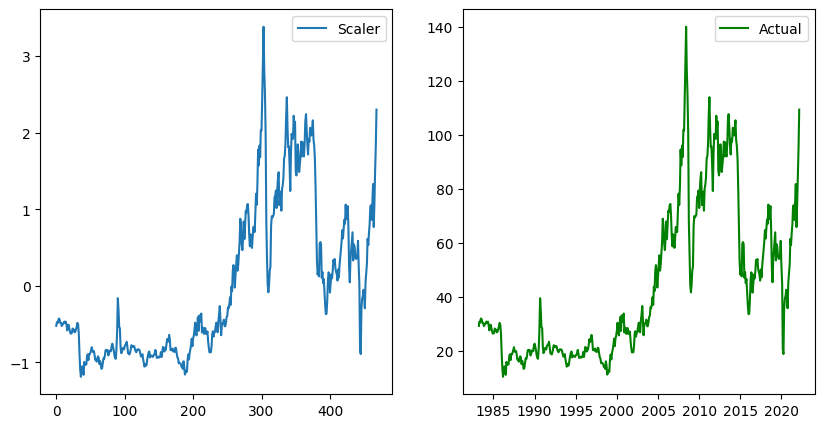

In [77]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(scale,label="Scaler")
plt.legend(loc="best")
plt.subplot(122)
plt.plot(OILDATA["price"],label="Actual",c='g')
plt.legend(loc="best")

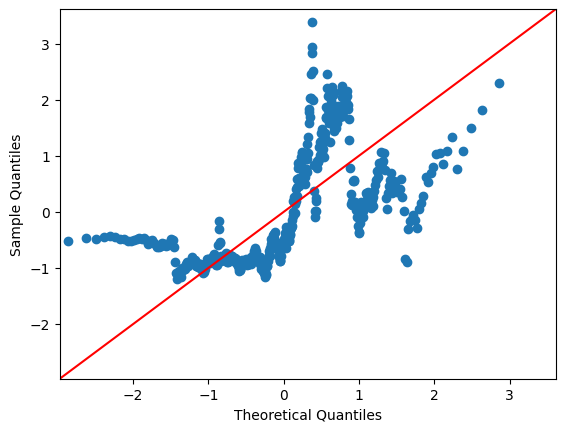

In [78]:
sm.qqplot(scale,line='45')
py.show()

In [79]:
adf_test(scale)

The time series is likely non-stationary.
ADF test statistic     -1.780108
p-value                 0.390381
# lags used             1.000000
# obsesrvations       467.000000
dtype: float64


### LOG Transform

In [80]:
k=np.log(OILDATA["price"])

In [81]:
Transform["Log"]=k

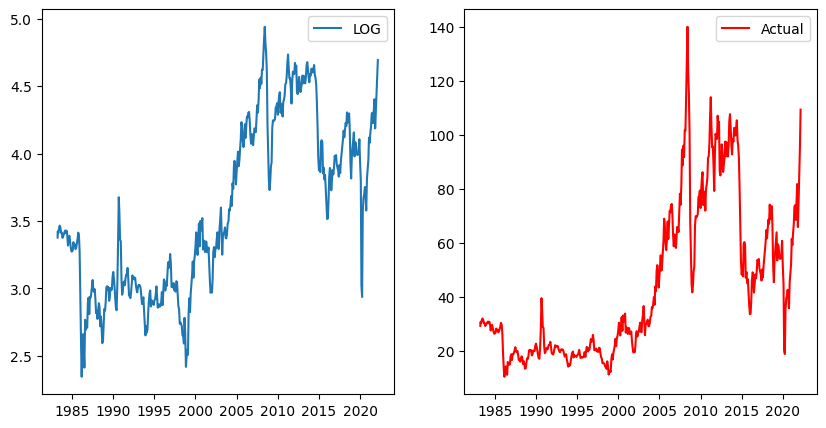

In [82]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(Transform["Log"],label="LOG")
plt.legend(loc="best")
plt.subplot(122)
plt.plot(OILDATA["price"],label="Actual",c='r')
plt.legend(loc="best")

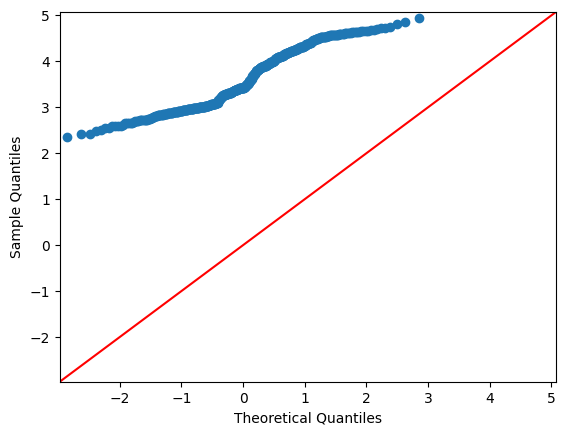

In [83]:
sm.qqplot(Transform["Log"],line='45')
py.show()

Text(0.5, 1.0, 'After log(ln) transformation')

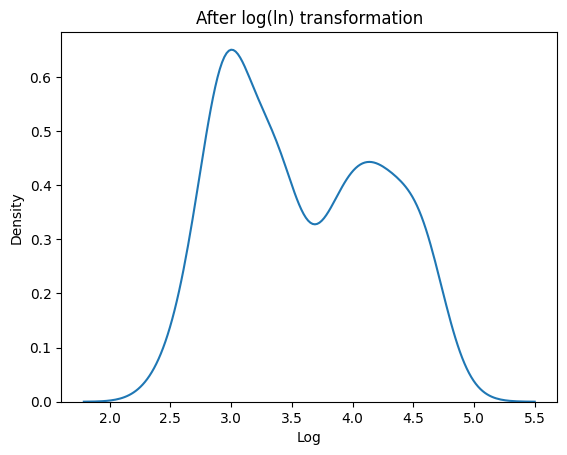

In [84]:
sns.kdeplot(data=Transform["Log"])
plt.title("After log(ln) transformation")

In [85]:
sts.adfuller(Transform["Log"])

(-1.3252362479812072,
 0.6175490845701668,
 4,
 464,
 {'1%': -3.4445220811896657,
  '5%': -2.8677891615873192,
  '10%': -2.5700985643950656},
 -740.903649136869)

In [86]:
adf_test(Transform["Log"])

The time series is likely non-stationary.
ADF test statistic     -1.325236
p-value                 0.617549
# lags used             4.000000
# obsesrvations       464.000000
dtype: float64


### Differencing Log Transformations

In [87]:
difLog=Transform["Log"]-Transform["Log"].shift()
difLog.dropna(inplace=True)

In [88]:
Transform["LOGDif"]=difLog

In [89]:
Transform["LOGDif"]

date
1983-03-30         NaN
1983-04-04    0.045417
1983-05-02   -0.012484
1983-06-01    0.036675
1983-07-01    0.019565
                ...   
2021-11-01   -0.216653
2021-12-01    0.128507
2022-01-03    0.144142
2022-02-01    0.101398
2022-03-01    0.132944
Name: LOGDif, Length: 469, dtype: float64

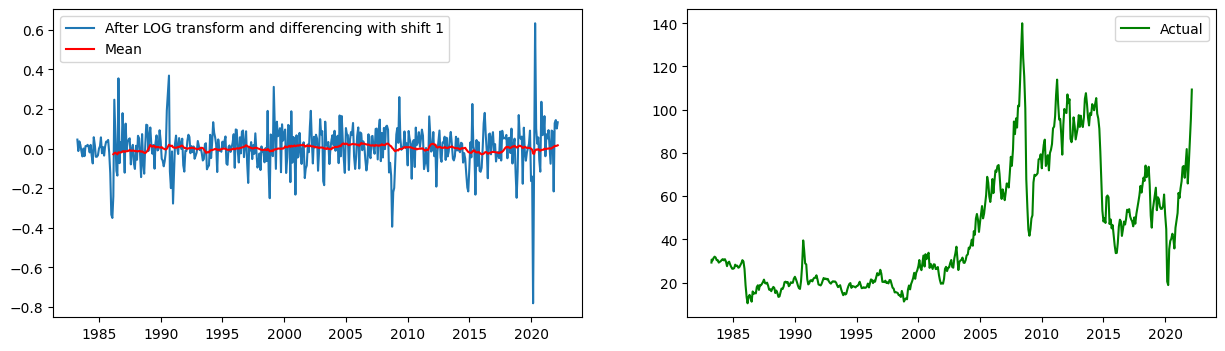

In [90]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(difLog,label="After LOG transform and differencing with shift 1")
plt.legend(loc="best")
rolling_mean=Transform["LOGDif"].rolling(window=36).mean()
plt.plot(rolling_mean,c='r',label="Mean")
plt.legend(loc="best")
plt.subplot(122)
plt.plot(OILDATA["price"],label="Actual",c='g')
plt.legend(loc="best")
plt.show()

Text(0.5, 1.0, 'After LOG and Differencing it')

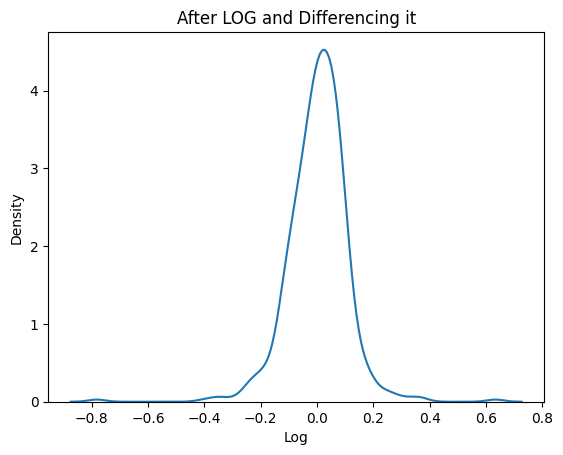

In [91]:
sns.kdeplot(data=difLog)
plt.title("After LOG and Differencing it")

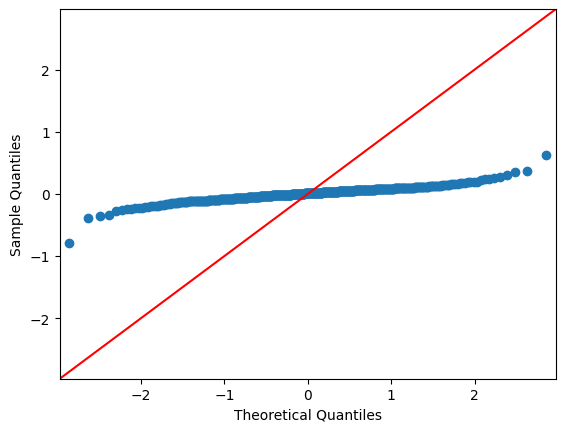

In [92]:
sm.qqplot(difLog,line='45')
py.show()

In [93]:
adf_test(difLog)

The time series is likely stationary.
ADF test statistic   -1.195567e+01
p-value               4.215645e-22
# lags used           3.000000e+00
# obsesrvations       4.640000e+02
dtype: float64


### SQRT Transformations

In [94]:
s=np.sqrt(OILDATA["price"])

In [95]:
Transform["Sqrt"]=s

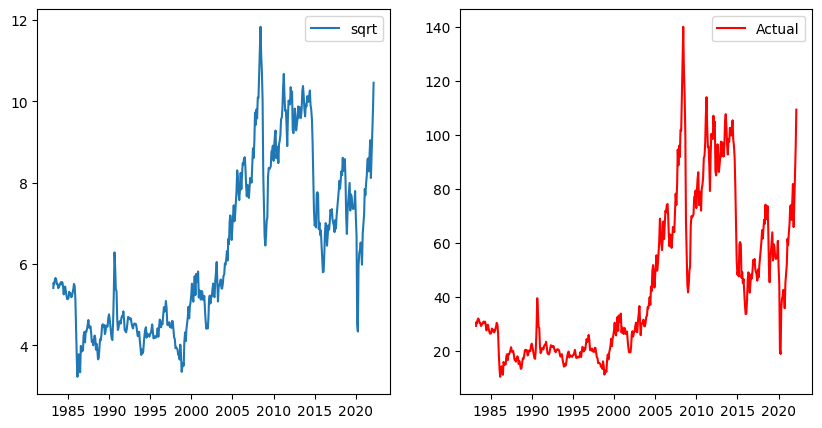

In [96]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(Transform["Sqrt"],label="sqrt")
plt.legend(loc="best")
plt.subplot(122)
plt.plot(OILDATA["price"],label="Actual",c='r')
plt.legend(loc="best")

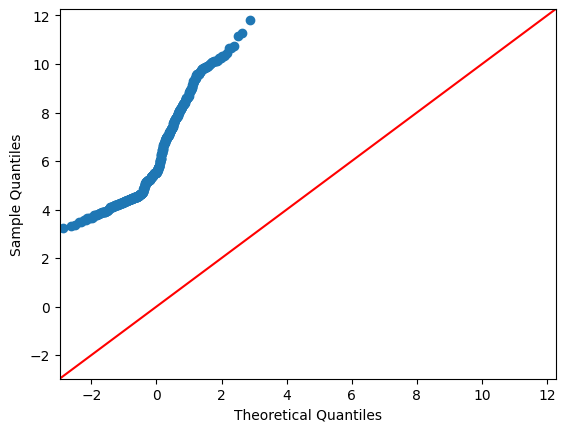

In [97]:
sm.qqplot(Transform["Sqrt"],line='45')
py.show()

Text(0.5, 1.0, 'After Square Root transformation')

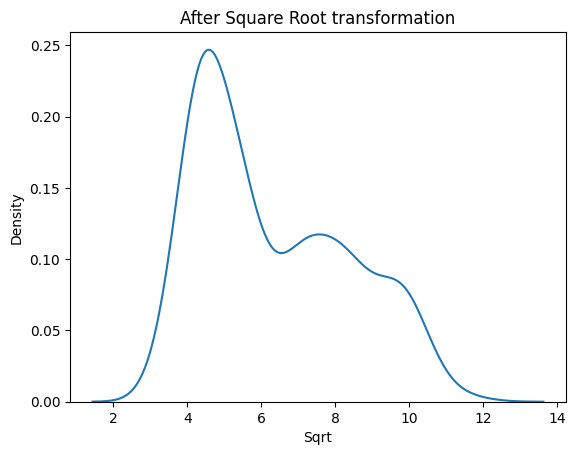

In [98]:
sns.kdeplot(data=Transform["Sqrt"])
plt.title("After Square Root transformation")

In [99]:
adf_test(Transform["Sqrt"])

The time series is likely non-stationary.
ADF test statistic     -1.662033
p-value                 0.450773
# lags used             1.000000
# obsesrvations       467.000000
dtype: float64


### Exponential transformation

In [100]:
Transform["Exp"]=np.exp(OILDATA["price"])

Text(0.5, 1.0, 'After exponential transformation')

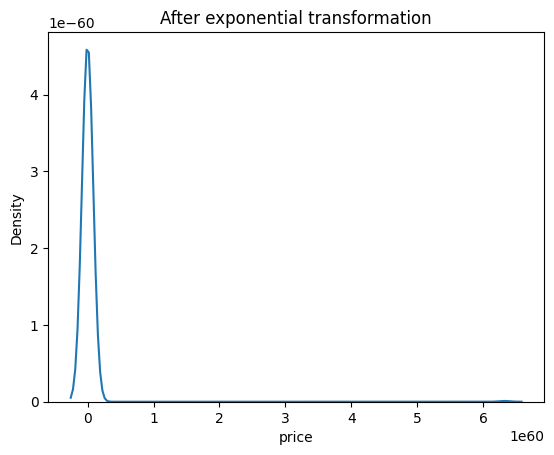

In [101]:
sns.kdeplot(data=np.exp(OILDATA["price"]))
plt.title("After exponential transformation")

In [102]:
import statsmodels.api as sm
import pylab as py

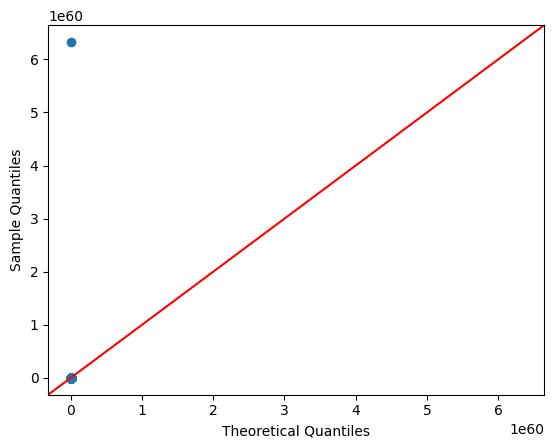

In [103]:
sm.qqplot(np.exp(OILDATA["price"]),line='45')
py.show()

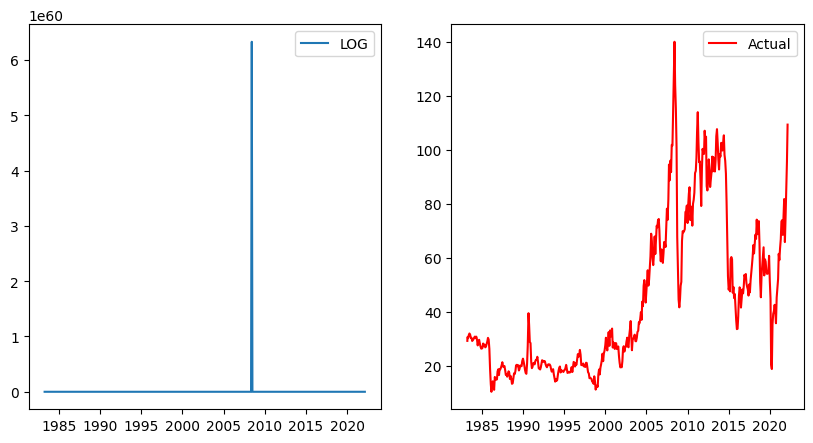

In [104]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(np.exp(OILDATA["price"]),label="LOG")
plt.legend(loc="best")
plt.subplot(122)
plt.plot(OILDATA["price"],label="Actual",c='r')
plt.legend(loc="best")

In [105]:
adf_test(np.exp(OILDATA["price"]))

The time series is likely stationary.
ADF test statistic    -21.610111
p-value                 0.000000
# lags used             0.000000
# obsesrvations       468.000000
dtype: float64


### Inverse Transformations

In [106]:
INVERSE=1/OILDATA["price"]

In [107]:
Transform["Inverse"]=INVERSE

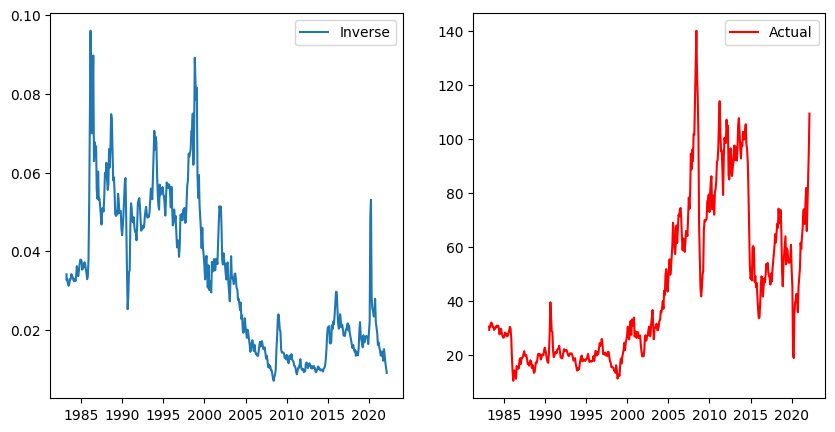

In [108]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(Transform["Inverse"],label="Inverse")
plt.legend(loc="best")
plt.subplot(122)
plt.plot(OILDATA["price"],label="Actual",c='r')
plt.legend(loc="best")

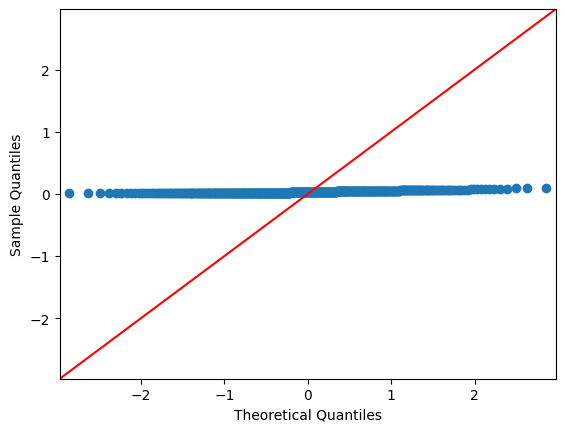

In [109]:
sm.qqplot(INVERSE,line='45')
py.show()

<Axes: xlabel='price', ylabel='Density'>

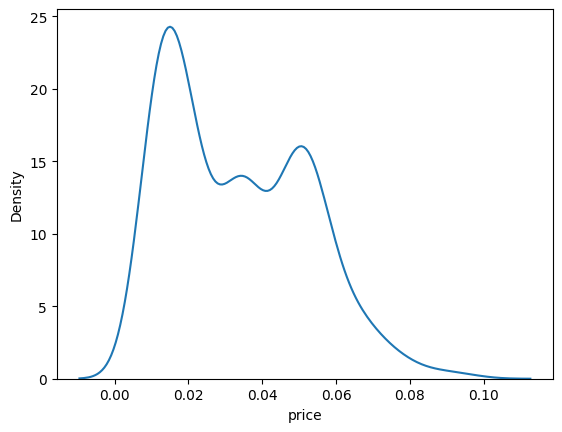

In [110]:
sns.kdeplot(data=INVERSE)

In [111]:
adf_test(INVERSE)

The time series is likely non-stationary.
ADF test statistic     -1.784550
p-value                 0.388159
# lags used             5.000000
# obsesrvations       463.000000
dtype: float64


### BOXCOX Transformation

A common transformation for stabilizing data with increasing variance over time is the Box-Cox transformation.

The Box-Cox transformation is a family of power transformations that can be applied to the data to stabilize its variance. It involves a parameter lambda that determines the type of transformation to apply. When lambda is 1, the transformation is a natural log transformation, which is similar to what you've applied already. When lambda is not equal to 1, the transformation is a power transformation that can be used to stabilize data with non-constant variance

In [112]:
from scipy.stats import boxcox

In [113]:
 boxcox,lambda_=boxcox(OILDATA["price"])

In [114]:
 lambda_

-0.22723015773717262

In [115]:
Transform["BOXCOX"]=pd.Series( boxcox,index=OILDATA.index)

In [116]:
Transform

Log    LOGDif       Sqrt           Exp   Inverse    BOXCOX
date                                                                       
1983-03-30  3.376563       NaN   5.410176  5.149908e+12  0.034165  2.357588
1983-04-04  3.421980  0.045417   5.534438  2.006504e+13  0.032648  2.378566
1983-05-02  3.409496 -0.012484   5.500000  1.372170e+13  0.033058  2.372821
1983-06-01  3.446171  0.036675   5.601785  4.247769e+13  0.031867  2.389652
1983-07-01  3.465736  0.019565   5.656854  7.896296e+13  0.031250  2.398573
...              ...       ...        ...           ...       ...       ...
2021-11-01  4.187379 -0.216653   8.114801  3.965442e+28  0.015186  2.701394
2021-12-01  4.315887  0.128507   8.653323  3.311089e+32  0.013355  2.750301
2022-01-03  4.460029  0.144142   9.300000  3.648629e+37  0.011562  2.803486
2022-02-01  4.561427  0.101398   9.783660  3.721070e+41  0.010447  2.839869
2022-03-01  4.694371  0.132944  10.456099  3.029812e+47  0.009147  2.886318

[469 rows x 6 columns]

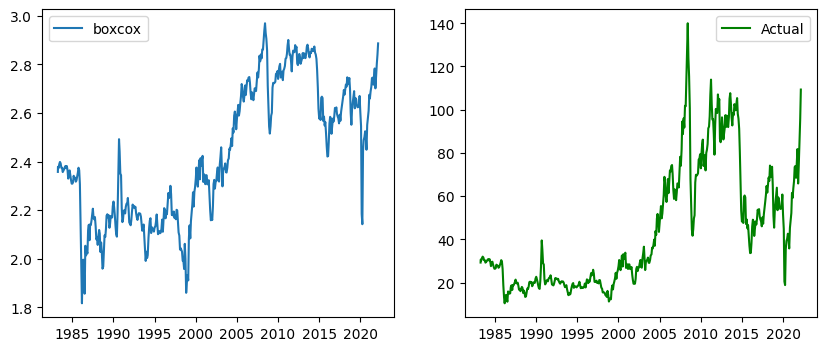

In [117]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(Transform["BOXCOX"],label="boxcox")
plt.legend(loc="best")
plt.subplot(122)
plt.plot(OILDATA["price"],label="Actual",c='g')
plt.legend(loc="best")

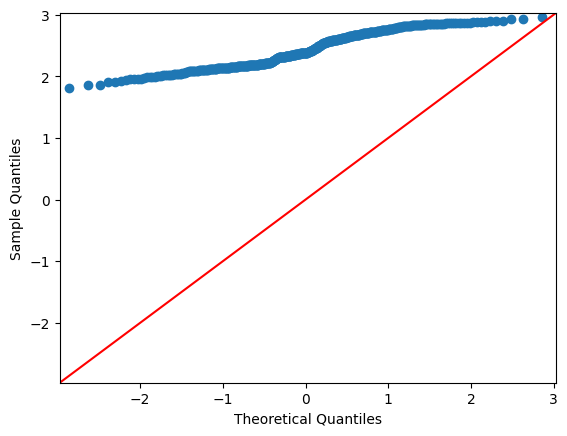

In [118]:
sm.qqplot(Transform["BOXCOX"],line='45')
py.show()

Text(0.5, 1.0, 'After BOXCOX Transformation(lmda=-0.227..)')

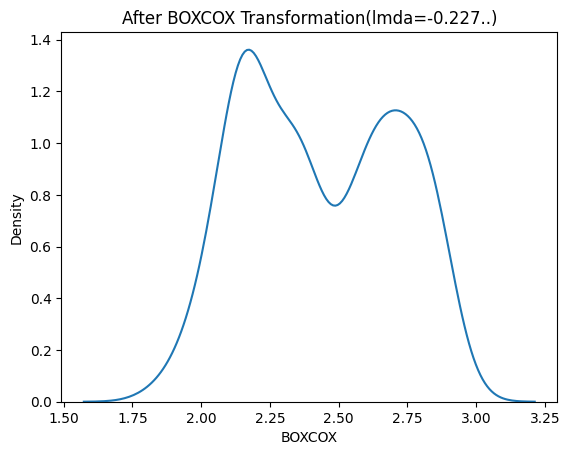

In [119]:
sns.kdeplot(data=Transform["BOXCOX"])
plt.title("After BOXCOX Transformation(lmda=-0.227..)")

In [120]:
adf_test(Transform["BOXCOX"])

The time series is likely non-stationary.
ADF test statistic     -1.408125
p-value                 0.578375
# lags used             4.000000
# obsesrvations       464.000000
dtype: float64


### Differencing BOXCOX Transformations

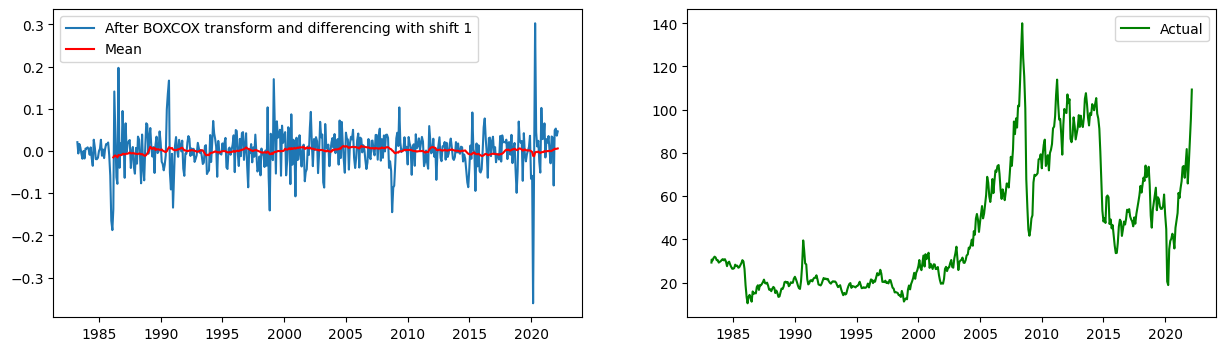

In [121]:
difboxcox=Transform["BOXCOX"]-Transform["BOXCOX"].shift()
difboxcox.dropna(inplace=True)
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(difboxcox,label="After BOXCOX transform and differencing with shift 1")
plt.legend(loc="best")
rolling_mean=difboxcox.rolling(window=36).mean()
plt.plot(rolling_mean,c='r',label="Mean")
plt.legend(loc="best")
plt.subplot(122)
plt.plot(OILDATA["price"],label="Actual",c='g')
plt.legend(loc="best")
plt.show()

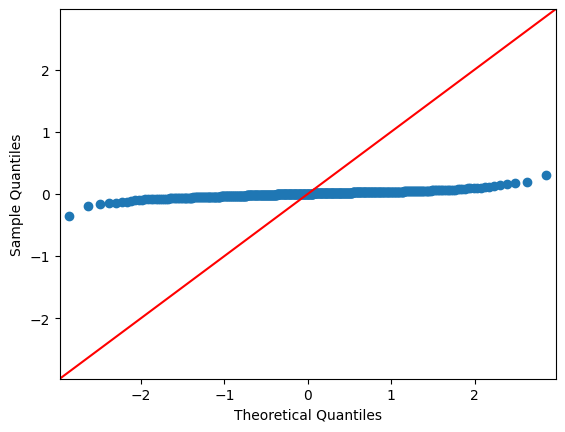

In [122]:
sm.qqplot(difboxcox,line='45')
py.show()

In [123]:
Transform["DiffBoxcox"]=difboxcox

In [124]:
Transform

Log    LOGDif       Sqrt           Exp   Inverse    BOXCOX  \
date                                                                          
1983-03-30  3.376563       NaN   5.410176  5.149908e+12  0.034165  2.357588   
1983-04-04  3.421980  0.045417   5.534438  2.006504e+13  0.032648  2.378566   
1983-05-02  3.409496 -0.012484   5.500000  1.372170e+13  0.033058  2.372821   
1983-06-01  3.446171  0.036675   5.601785  4.247769e+13  0.031867  2.389652   
1983-07-01  3.465736  0.019565   5.656854  7.896296e+13  0.031250  2.398573   
...              ...       ...        ...           ...       ...       ...   
2021-11-01  4.187379 -0.216653   8.114801  3.965442e+28  0.015186  2.701394   
2021-12-01  4.315887  0.128507   8.653323  3.311089e+32  0.013355  2.750301   
2022-01-03  4.460029  0.144142   9.300000  3.648629e+37  0.011562  2.803486   
2022-02-01  4.561427  0.101398   9.783660  3.721070e+41  0.010447  2.839869   
2022-03-01  4.694371  0.132944  10.456099  3.029812e+47  0.009147  2.886318   

            DiffBoxcox  
date                    
1983-03-30         NaN  
1983-04-04    0.020978  
1983-05-02   -0.005745  
1983-06-01    0.016830  
1983-07-01    0.008921  
...                ...  
2021-11-01   -0.081637  
2021-12-01    0.048907  
2022-01-03    0.053185  
2022-02-01    0.036383  
2022-03-01    0.046449  

[469 rows x 7 columns]

So we got transformation after Differencing BOXCOX

Text(0.5, 1.0, 'After DIff BoxCOx')

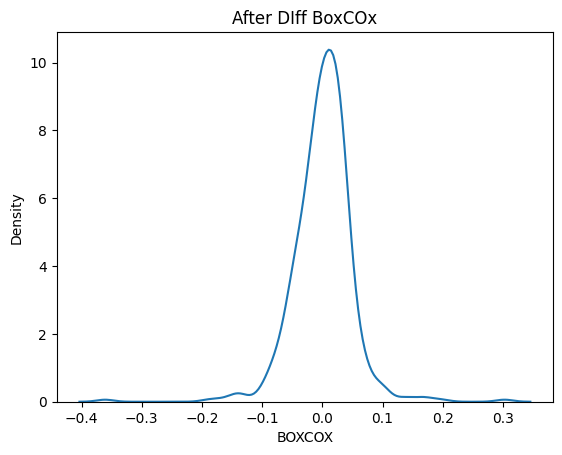

In [125]:
sns.kdeplot(data=difboxcox)
plt.title("After DIff BoxCOx")

In [126]:
adf_test(difboxcox)

The time series is likely stationary.
ADF test statistic   -1.126417e+01
p-value               1.594655e-20
# lags used           4.000000e+00
# obsesrvations       4.630000e+02
dtype: float64


## AR MA ARIMA Models

### LLR (Log Likelihood Ratiou)

LLR = -2 * (log-likelihood of Model 1 - log-likelihood of Model 2)


The Log-Likelihood Ratio (LLR) test is a statistical test used in forecasting to assess the adequacy of a model. It is based on comparing the log-likelihoods of two competing models to determine which one provides a better fit to the data.

Here's how the LLR test works in forecasting:

1.)Define competing models: Start by specifying two competing models that you want to compare. These models should represent different hypotheses or assumptions about the underlying data generating process.

2.)Estimate the models: Estimate the parameters of each model using a suitable estimation technique, such as maximum likelihood estimation.

3.)Calculate the log-likelihoods: Compute the log-likelihood for each model using the estimated parameters. The log-likelihood measures the goodness of fit of the model to the observed data.

4.)Calculate the LLR test statistic: The LLR test statistic is calculated as the difference between the log-likelihoods of the two models multiplied by -2. Mathematically, LLR = -2 * (log-likelihood of Model 1 - log-likelihood of Model 2).

5.)Perform hypothesis testing: Assess the statistical significance of the LLR test statistic. This involves comparing the computed test statistic with the critical values from the chi-square distribution at a given significance level (e.g., 0.05 or 0.01). If the computed test statistic exceeds the critical value, you reject the null hypothesis, indicating that one model provides a significantly better fit than the other.

6.)Interpretation: If the LLR test indicates a significant difference between the two models, you can conclude that one model is superior to the other in terms of its ability to explain the observed data. This information can help you select the most appropriate model for forecasting.

7.)It's worth noting that the LLR test assumes that the models being compared are nested, meaning that one model is a special case of the other. Additionally, the LLR test can be used in various forecasting contexts, such as comparing different time series models, comparing different nonlinear regression models, or evaluating the significance of adding or removing variables from a model.

Overall, the LLR test is a valuable tool for model selection and hypothesis testing in forecasting, allowing you to make more informed decisions based on the fit of competing models to the available data.

L(θ|X) = ln( f(X|θ) ),

where f(X|θ) is the probability density function (PDF) or probability mass function (PMF) of the model, depending on whether the data is continuous or discrete.

The log-likelihood of a model is a measure of how well the model fits the observed data. It quantifies the probability of observing the given data, assuming that the model's parameters are correctly estimated.

#### For best order values

In [127]:
def LLR_test(ARmodel_1,ARmodel_2,DF=1):
    L1=ARmodel_1.fit().llf
    L2=ARmodel_2.fit().llf
    LR=(2*(L2-L1))
    p=chi2.sf(LR,DF).round(3)
    return p

H0:No improvement(p> alpha)

H1:Significant improvement(p<alpha)

Hypothesis condition for LLR Test

### We will check ACF and PACF For LOG Diff.

## AR Model

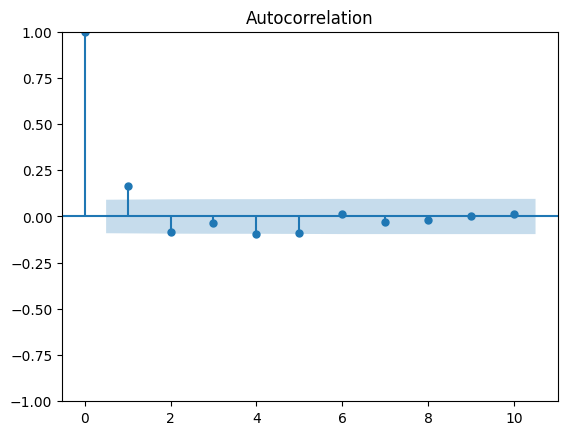

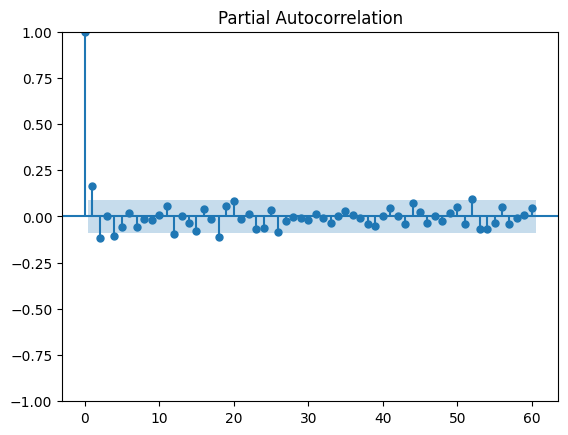

In [128]:
tsa_plots.plot_acf(difLog,lags=10)
tsa_plots.plot_pacf(difLog,lags=60)
plt.show()

From previous PACF Order for AR is 3 so Let us do for LLR

###### AR 1 WITH ORDER 2(ARIMA WITH ORDER(P,0,0) IS EQVALENT TO AR MODEL)

In [129]:
from statsmodels.tsa.arima.model import ARIMA

In [130]:
Trn=Transform.iloc[:390]
Tst=Transform.iloc[390:]

In [131]:
Transform

Log    LOGDif       Sqrt           Exp   Inverse    BOXCOX  \
date                                                                          
1983-03-30  3.376563       NaN   5.410176  5.149908e+12  0.034165  2.357588   
1983-04-04  3.421980  0.045417   5.534438  2.006504e+13  0.032648  2.378566   
1983-05-02  3.409496 -0.012484   5.500000  1.372170e+13  0.033058  2.372821   
1983-06-01  3.446171  0.036675   5.601785  4.247769e+13  0.031867  2.389652   
1983-07-01  3.465736  0.019565   5.656854  7.896296e+13  0.031250  2.398573   
...              ...       ...        ...           ...       ...       ...   
2021-11-01  4.187379 -0.216653   8.114801  3.965442e+28  0.015186  2.701394   
2021-12-01  4.315887  0.128507   8.653323  3.311089e+32  0.013355  2.750301   
2022-01-03  4.460029  0.144142   9.300000  3.648629e+37  0.011562  2.803486   
2022-02-01  4.561427  0.101398   9.783660  3.721070e+41  0.010447  2.839869   
2022-03-01  4.694371  0.132944  10.456099  3.029812e+47  0.009147  2.886318   

            DiffBoxcox  
date                    
1983-03-30         NaN  
1983-04-04    0.020978  
1983-05-02   -0.005745  
1983-06-01    0.016830  
1983-07-01    0.008921  
...                ...  
2021-11-01   -0.081637  
2021-12-01    0.048907  
2022-01-03    0.053185  
2022-02-01    0.036383  
2022-03-01    0.046449  

[469 rows x 7 columns]

In [132]:
ARmodel_1=ARIMA(Trn["LOGDif"],order=(2,0,0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [133]:
AR1RESULT=ARmodel_1.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [134]:
AR1RESULT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 LOGDif   No. Observations:                  390
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 369.722
Date:                Wed, 14 Jun 2023   AIC                           -731.443
Time:                        17:53:47   BIC                           -715.579
Sample:                             0   HQIC                          -725.154
                                - 390                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.006      0.249      0.804      -0.010       0.012
ar.L1          0.1793      0.040      4.490      0.000       0.101       0.258
ar.L2         -0.0490      0.042     -1.155      0.248      -0.132       0.034
sigma2         0.0087      0.000     19.420      0.000       0.008       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.33
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.01
Prob(H) (two-sided):                  0.56   Kurtosis:                         5.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### AR 2 Model

In [135]:
ARmodel_2=ARIMA(Trn["LOGDif"],order=(3,0,0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [136]:
AR2RESULT=ARmodel_2.fit()

In [137]:
AR2RESULT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 LOGDif   No. Observations:                  390
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 369.770
Date:                Wed, 14 Jun 2023   AIC                           -729.539
Time:                        17:53:49   BIC                           -709.709
Sample:                             0   HQIC                          -721.678
                                - 390                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.006      0.244      0.807      -0.010       0.013
ar.L1          0.1801      0.040      4.491      0.000       0.102       0.259
ar.L2         -0.0519      0.047     -1.111      0.267      -0.144       0.040
ar.L3          0.0158      0.049      0.323      0.747      -0.080       0.112
sigma2         0.0087      0.000     19.407      0.000       0.008       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                66.88
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.01
Prob(H) (two-sided):                  0.56   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [138]:
LLR_test(ARmodel_1,ARmodel_2,DF=1)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.757

Higher value we get as p > alpha so we failed to reject null hypothesis and we conclude that AR model according to PACF we will  Keep as 2

So we will analayse the residual for Model

In [139]:
Trn["AR_resid"]=AR1RESULT.resid

In [140]:
Trn["AR_resid"]

date
1983-03-30         NaN
1983-04-04    0.044013
1983-05-02   -0.021412
1983-06-01    0.039918
1983-07-01    0.011156
                ...   
2015-04-01    0.233583
2015-05-01   -0.032628
2015-06-01   -0.006044
2015-07-01   -0.230963
2015-08-03    0.083038
Name: AR_resid, Length: 390, dtype: float64

In [141]:
Trn.AR_resid.mean()

-1.5508350299686554e-05

In [142]:
Trn.AR_resid.var()

0.008771427324964364

##### from above resid and mean not high its too less so its good

Mean=0

constant variance

Normal Disstribution

No Autocorelation

#### Residuals Must be stationary

In [143]:
Trn["AR_resid"]

date
1983-03-30         NaN
1983-04-04    0.044013
1983-05-02   -0.021412
1983-06-01    0.039918
1983-07-01    0.011156
                ...   
2015-04-01    0.233583
2015-05-01   -0.032628
2015-06-01   -0.006044
2015-07-01   -0.230963
2015-08-03    0.083038
Name: AR_resid, Length: 390, dtype: float64

In [144]:
resid=Trn["AR_resid"].iloc[1:]

In [145]:
adf_test(resid)

The time series is likely stationary.
ADF test statistic    -19.61039
p-value                 0.00000
# lags used             0.00000
# obsesrvations       388.00000
dtype: float64


p value 0 and H1: data stationary so accept alternate hypothesis.So constant variance and no pattern in the Data.

In [146]:
resid

date
1983-04-04    0.044013
1983-05-02   -0.021412
1983-06-01    0.039918
1983-07-01    0.011156
1983-08-01   -0.015828
                ...   
2015-04-01    0.233583
2015-05-01   -0.032628
2015-06-01   -0.006044
2015-07-01   -0.230963
2015-08-03    0.083038
Name: AR_resid, Length: 389, dtype: float64

#### ACF among residuals(should be less or NO)

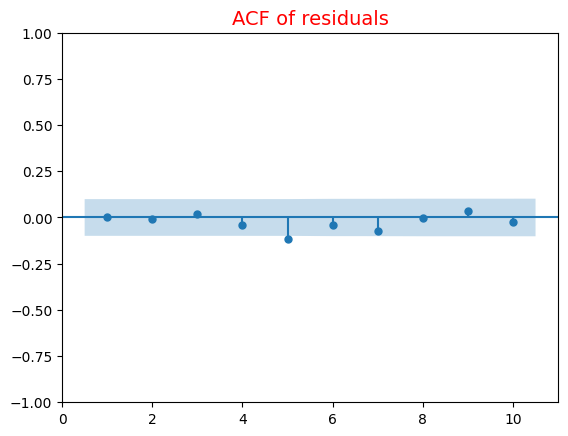

In [147]:
tsa_plots.plot_acf(resid,zero=False,lags=10)
plt.title("ACF of residuals",c='r',size=14)
plt.show()

No significant ACF specially on lags we considered for AR models for order 2.

#### Residuals must be random

Text(0.5, 1.0, 'Resid is normally distributed')

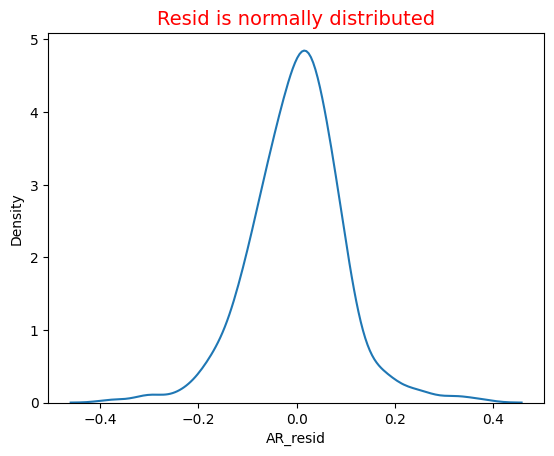

In [148]:
sns.kdeplot(data=resid)
plt.title("Resid is normally distributed",c='r',size=14)

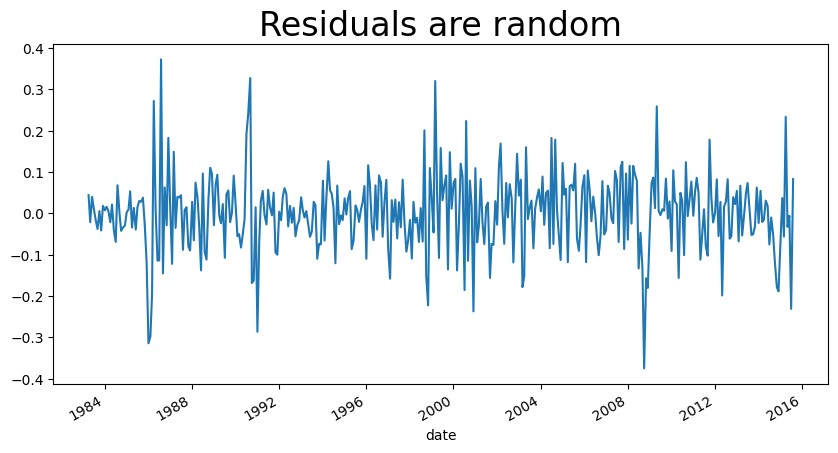

In [149]:
resid.plot(figsize=(10,5))
plt.title("Residuals are random",size=24)
plt.show()

residual is random and no pattern its how the noise looks like so our model is good.

And mean of ressid also nearly zero can observe from above plot.

No significant ACF specially on lags we considered for AR models for order 2.

#### AR model RMSE with test data

In [150]:
Tst["LOGDif"]

date
2015-09-01   -0.087233
2015-10-01    0.032725
2015-11-02   -0.112085
2015-12-01   -0.117303
2016-01-01   -0.096877
                ...   
2021-11-01   -0.216653
2021-12-01    0.128507
2022-01-03    0.144142
2022-02-01    0.101398
2022-03-01    0.132944
Name: LOGDif, Length: 79, dtype: float64

In [151]:
ARmodel=ARIMA(Tst["LOGDif"],order=(2,0,0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [152]:
ARRESULT=ARmodel.fit()

In [153]:
start_value = pd.to_datetime('2015-09-01')
end_value = pd.to_datetime('2022-03-01')

In [154]:
start_index = Tst["LOGDif"].index.get_loc(start_value)
end_index = Tst["LOGDif"].index.get_loc(end_value)

In [155]:
PredictedAr=ARRESULT.predict(satart=start_index, end=end_index )

In [156]:
#PredictedAr

In [157]:
#PredictedAr=Tst.LOGDif.iloc[-1]+PredictedAr.cumsum()

In [158]:
#PredictedAr=np.exp(PredictedAr)

In [159]:
#PredictedAr

In [160]:
#AR_mse = np.mean((Test["price"] - PredictedAr)**2)

In [161]:
#AR_rmse = np.sqrt(AR_mse)
#AR_rmse

In [162]:
testPredictar=PredictedAr

In [163]:
testPredictarlist = []
testPredictarlist.append(Tst.Log[0])  # Initialize with the first value of the log-transformed series

for i in range(1, len(Tst)):
    testPredictarlist.append(testPredictarlist[i-1] + testPredictar[i-1])

testPredictar = np.array(testPredictarlist)
testPredictar = np.exp(testPredictar)

In [164]:
Tst['AR']=testPredictar
Tst['AR']

date
2015-09-01     45.090000
2015-10-01     45.530720
2015-11-02     45.316335
2015-12-01     47.135692
2016-01-01     46.240913
                 ...    
2021-11-01     96.982507
2021-12-01     97.259482
2022-01-03     92.261048
2022-02-01    101.065784
2022-03-01    101.467890
Name: AR, Length: 79, dtype: float64

In [165]:
AR_rmse=np.sqrt(np.mean(OILDATA.iloc[390:,0]-testPredictar)**2)
AR_rmse

14.381125583957644

## MA Model

from above ACF graph we got MA order q as 2 so let us buid model to confirm the order accurately.

In [166]:
MAmodel_1=ARIMA(Trn["LOGDif"],order=(0,0,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [167]:
MAresult1=MAmodel_1.fit()

In [168]:
MAresult1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 LOGDif   No. Observations:                  390
Model:                 ARIMA(0, 0, 2)   Log Likelihood                 369.816
Date:                Wed, 14 Jun 2023   AIC                           -731.632
Time:                        17:53:55   BIC                           -715.767
Sample:                             0   HQIC                          -725.343
                                - 390                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.006      0.246      0.806      -0.010       0.013
ma.L1          0.1809      0.040      4.540      0.000       0.103       0.259
ma.L2         -0.0234      0.042     -0.556      0.578      -0.106       0.059
sigma2         0.0087      0.000     19.416      0.000       0.008       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                66.92
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.01
Prob(H) (two-sided):                  0.56   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [169]:
MAmodel_2=ARIMA(Trn["LOGDif"],order=(0,0,3))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [170]:
MAresult2=MAmodel_2.fit()

In [171]:
MAresult2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 LOGDif   No. Observations:                  390
Model:                 ARIMA(0, 0, 3)   Log Likelihood                 369.834
Date:                Wed, 14 Jun 2023   AIC                           -729.669
Time:                        17:53:57   BIC                           -709.838
Sample:                             0   HQIC                          -721.808
                                - 390                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.006      0.242      0.809      -0.010       0.013
ma.L1          0.1811      0.040      4.525      0.000       0.103       0.260
ma.L2         -0.0193      0.042     -0.457      0.648      -0.102       0.064
ma.L3          0.0107      0.042      0.256      0.798      -0.072       0.093
sigma2         0.0087      0.000     19.366      0.000       0.008       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                66.07
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.01
Prob(H) (two-sided):                  0.55   Kurtosis:                         5.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [172]:
LLR_test(MAmodel_1,MAmodel_2,DF=1)

0.847

P>alpha so null hypothesis is failed to reject and no improvement from 2 to 3 so MA model q order we will finalise as 2.

In [173]:
Trn['MA_resid']=MAresult1.resid

In [174]:
Trn.MA_resid.mean()

-1.2489869424375386e-05

In [175]:
Trn.MA_resid.var()

0.008767151220383866

from above resid and mean not high its too less so its good

 Residuals of model should follow-->:

Mean=0

constant variance

Normal Disstribution

No Autocorelation

##### Residuals Must be stationary

In [176]:
maresid=Trn.MA_resid.dropna()

In [177]:
adf_test(maresid)

The time series is likely stationary.
ADF test statistic    -19.629864
p-value                 0.000000
# lags used             0.000000
# obsesrvations       388.000000
dtype: float64


p - value nearly zero so it is stationary.

#### ACF among residuals

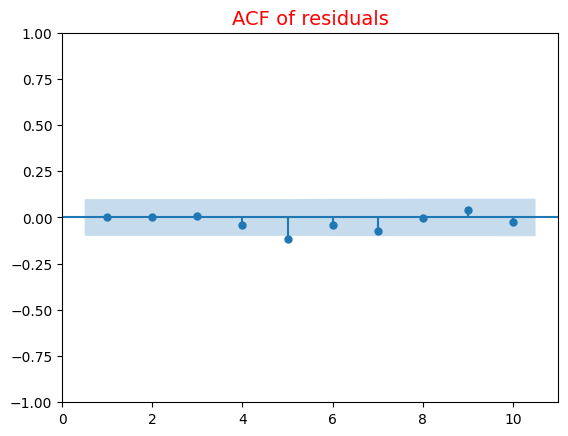

In [178]:
tsa_plots.plot_acf(maresid,zero=False,lags=10)
plt.title("ACF of residuals",c='r',size=14)
plt.show()

No significant ACF specially on lags we considered for AR models for order 2.

#### Residuals must be random.

Text(0.5, 1.0, 'Resid is normally distributed')

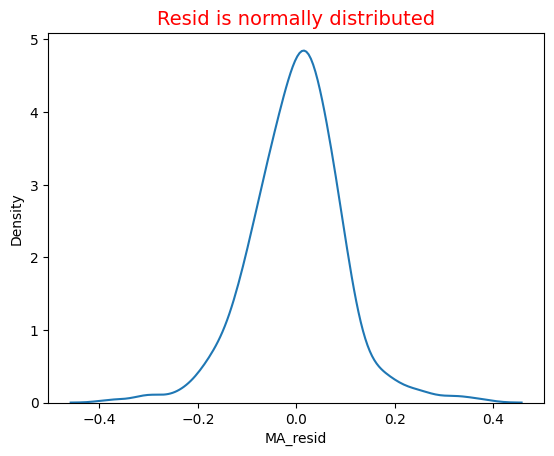

In [179]:
sns.kdeplot(data=Trn.MA_resid)
plt.title("Resid is normally distributed",c='r',size=14)

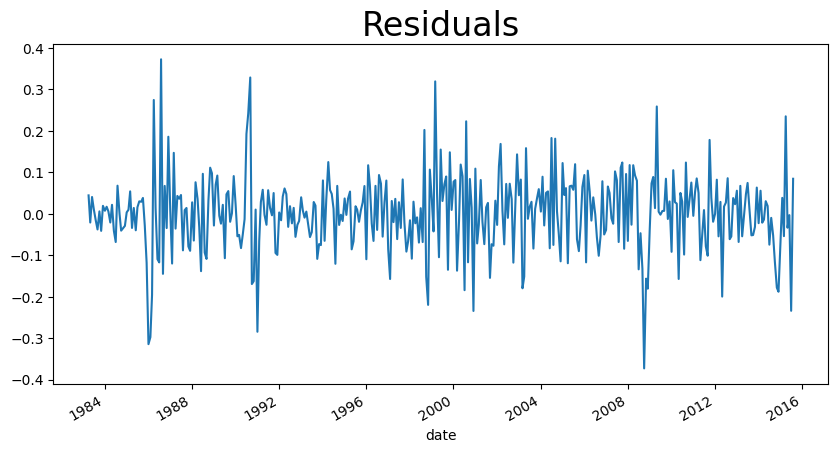

In [180]:
Trn.MA_resid.plot(figsize=(10,5))
plt.title("Residuals",size=24)
plt.show()

residual is random and no pattern its how the noise looks like so our model is good.

And mean of ressid also nearly zero can observe from above plot.

No significant ACF specially on lags we considered for MA models for order 2.

#### MA Model performance with Test data

In [181]:
MAmodel=ARIMA(Trn["LOGDif"],order=(0,0,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [182]:
MAresult=MAmodel.fit()

In [183]:
start_value = pd.to_datetime('2015-09-01')
end_value = pd.to_datetime('2022-03-01')

In [184]:
start_index = Tst["LOGDif"].index.get_loc(start_value)
end_index = Tst["LOGDif"].index.get_loc(end_value)

In [185]:
Predictedma=MAresult.predict(satart=start_index, end=end_index)

In [186]:
#Predictedma=np.exp(Predictedma)

In [187]:
#Predictedma=Tst.LOGDif.iloc[-1]+Predictedma.cumsum()

In [188]:
#MA_mse = np.mean((Test["price"] - Predictedma)**2)

In [189]:
#MA_rmse=np.sqrt(MA_mse)

In [190]:
#MA_mse

In [191]:
#MA_rmse

In [192]:
testPredictma=Predictedma

In [193]:
testPredictmalist = []
testPredictmalist.append(Tst.Log[0])  # Initialize with the first value of the log-transformed series

for i in range(1, len(Tst)):
    testPredictmalist.append(testPredictmalist[i-1] + testPredictma[i-1])

testPredictma = np.array(testPredictmalist)
testPredictma = np.exp(testPredictma)

In [194]:
testPredictma

array([45.09      , 45.15311012, 45.21630858, 45.6217138 , 45.46430125,
       45.88255907, 45.99012714, 45.91650691, 45.68108977, 45.83122704,
       45.54587086, 45.8097942 , 45.9116155 , 46.10675075, 46.19952518,
       46.08009293, 46.34549502, 46.04106796, 45.58242904, 46.28035296,
       46.26706055, 45.98991767, 45.80557639, 45.66324157, 45.78453733,
       45.92324156, 46.42627919, 46.14385934, 46.36036488, 46.07450044,
       46.31165463, 46.60908809, 46.88382106, 47.24047648, 47.02126895,
       46.11815237, 43.74771881, 41.81710025, 40.70051327, 43.02684029,
       42.91912071, 42.11949112, 41.39661448, 44.46473332, 42.99568894,
       43.72864329, 43.4472939 , 45.02930153, 44.96509939, 44.04934278,
       45.42482347, 45.03748857, 45.48857131, 45.80343931, 46.20331059,
       45.48473131, 45.71367232, 45.88199406, 45.2788343 , 44.69524459,
       45.07355007, 44.58130743, 45.32805177, 45.60138651, 45.3553819 ,
       44.32752434, 45.31469418, 44.51399281, 43.80086803, 44.22

In [195]:
Tst['MA']=testPredictma

In [196]:
MA_rmse=np.sqrt(np.mean(OILDATA.iloc[390:,0]-testPredictma)**2)
MA_rmse

9.846422945217967

## ARMA model

order in ARIMA(P,0,Q) we already got order of AR and MA as 2 so let us try here and no use of trying LLR since we verified it individually in AR and MA.

In [197]:
ARMAmodel=ARIMA(Trn["LOGDif"],order=(2,0,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [198]:
ARMAresult=ARMAmodel.fit()

In [199]:
ARMAresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 LOGDif   No. Observations:                  390
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 369.826
Date:                Wed, 14 Jun 2023   AIC                           -727.652
Time:                        17:54:02   BIC                           -703.855
Sample:                             0   HQIC                          -718.219
                                - 390                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.006      0.244      0.807      -0.010       0.013
ar.L1          0.0855     42.298      0.002      0.998     -82.817      82.988
ar.L2          0.0330      5.530      0.006      0.995     -10.805      10.871
ma.L1          0.0951     42.297      0.002      0.998     -82.805      82.996
ma.L2         -0.0716     13.171     -0.005      0.996     -25.887      25.743
sigma2         0.0087      0.000     19.079      0.000       0.008       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                66.72
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.01
Prob(H) (two-sided):                  0.56   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [200]:
Trn['ARMAresid']=ARMAresult.resid

In [201]:
Trn['ARMAresid'].mean()

-1.3157962255644775e-05

In [202]:
Trn['ARMAresid'].var()

0.008766694071656174

mean is nearly zero and variance is very less.

#### Resid must be stationary

In [203]:
arimaresid=Trn.ARMAresid.dropna()

In [204]:
adf_test(arimaresid)

The time series is likely stationary.
ADF test statistic    -19.622705
p-value                 0.000000
# lags used             0.000000
# obsesrvations       388.000000
dtype: float64


p-value zero so residual is stationary

#### ACF among residuals

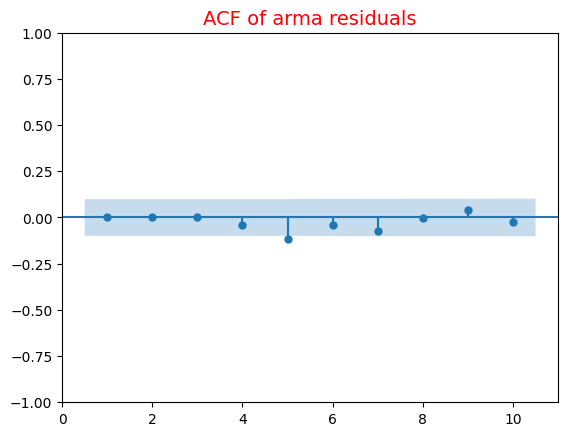

In [205]:
tsa_plots.plot_acf(arimaresid,zero=False,lags=10)
plt.title("ACF of arma residuals",c='r',size=14)
plt.show()

No auto correlation among the lags so residuals are free from Auto correlation.

#### Residuals must be random

Text(0.5, 1.0, 'Arma Resid is normally distributed')

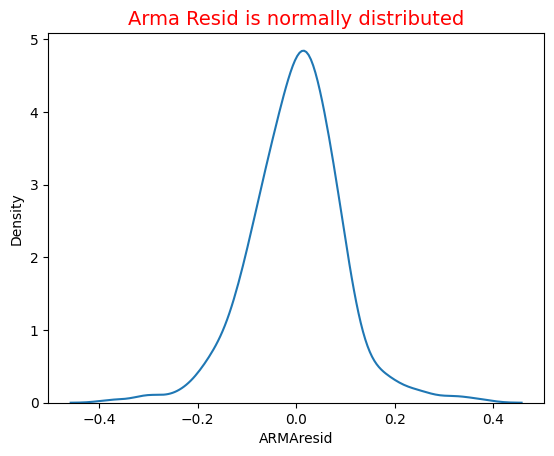

In [206]:
sns.kdeplot(data=Trn.ARMAresid)
plt.title("Arma Resid is normally distributed",c='r',size=14)

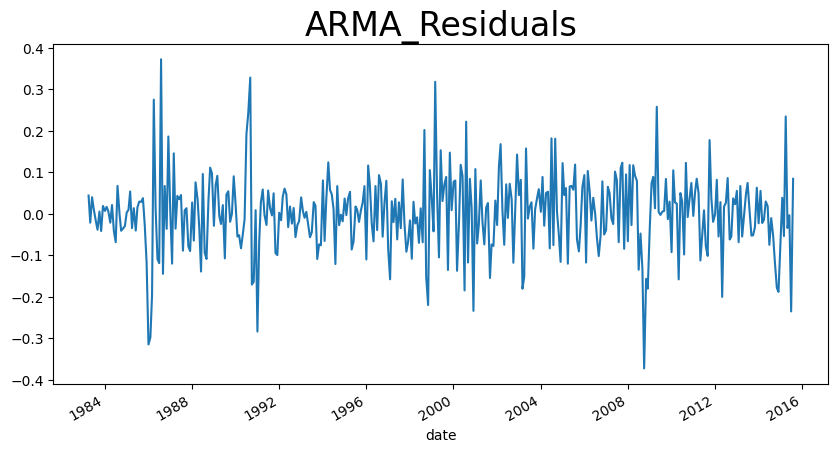

In [207]:
Trn.ARMAresid.plot(figsize=(10,5))
plt.title("ARMA_Residuals",size=24)
plt.show()

residual is random and no pattern its how the noise looks like so our model is good.

And mean of ressid also nearly zero can observe from above plot.

#### MODEL Performance with Test Data

In [208]:
Tst

Log    LOGDif       Sqrt           Exp   Inverse    BOXCOX  \
date                                                                          
2015-09-01  3.808660 -0.087233   6.714909  3.822418e+19  0.022178  2.548670   
2015-10-01  3.841386  0.032725   6.825687  1.713089e+20  0.021464  2.562392   
2015-11-02  3.729301 -0.112085   6.453681  1.225646e+18  0.024010  2.514968   
2015-12-01  3.611998 -0.117303   6.086050  1.219741e+16  0.026998  2.464025   
2016-01-01  3.515121 -0.096877   5.798276  3.990070e+14  0.029744  2.420916   
...              ...       ...        ...           ...       ...       ...   
2021-11-01  4.187379 -0.216653   8.114801  3.965442e+28  0.015186  2.701394   
2021-12-01  4.315887  0.128507   8.653323  3.311089e+32  0.013355  2.750301   
2022-01-03  4.460029  0.144142   9.300000  3.648629e+37  0.011562  2.803486   
2022-02-01  4.561427  0.101398   9.783660  3.721070e+41  0.010447  2.839869   
2022-03-01  4.694371  0.132944  10.456099  3.029812e+47  0.009147  2.886318   

            DiffBoxcox          AR         MA  
date                                           
2015-09-01   -0.036352   45.090000  45.090000  
2015-10-01    0.013722   45.530720  45.153110  
2015-11-02   -0.047424   45.316335  45.216309  
2015-12-01   -0.050943   47.135692  45.621714  
2016-01-01   -0.043108   46.240913  45.464301  
...                ...         ...        ...  
2021-11-01   -0.081637   96.982507  47.062839  
2021-12-01    0.048907   97.259482  46.984471  
2022-01-03    0.053185   92.261048  46.850817  
2022-02-01    0.036383  101.065784  47.123937  
2022-03-01    0.046449  101.467890  46.257775  

[79 rows x 9 columns]

In [209]:
ARMAmodel=ARIMA(Trn["LOGDif"],order=(2,0,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [210]:
ARMAresult=ARMAmodel.fit()

In [211]:
start_value = pd.to_datetime('2015-09-01')
end_value = pd.to_datetime('2022-03-01')

In [212]:
start_index = Tst["LOGDif"].index.get_loc(start_value)
end_index = Tst["LOGDif"].index.get_loc(end_value)

In [213]:
PredictedARMA=ARMAresult.predict(satart=start_index, end=end_index)

In [214]:
#PredictedARMA=PredictedARMA.cumsum()+Tst.LOGDif.iloc[-1]

In [215]:
#PredictedARMA=np.exp(PredictedARMA)

In [216]:
#ARMA_mse = np.mean((Test["price"] - PredictedARMA)**2)

In [217]:
#ARMA_mse

In [218]:
#ARMA_rmse=np.sqrt(ARMA_mse)

In [219]:
#ARMA_rmse

In [220]:
testPredictarma=ARMAresult.predict(satart=start_index, end=end_index)

In [221]:
testPredictarmalist = []
testPredictarmalist.append(Tst.Log[0])  # Initialize with the first value of the log-transformed series

for i in range(1, len(Tst)):
    testPredictarmalist.append(testPredictarmalist[i-1] + testPredictarma[i-1])

testPredictarma = np.array(testPredictarmalist)
testPredictarma = np.exp(testPredictarma)

In [222]:
testPredictarma

array([45.09      , 45.15308427, 45.21625679, 45.6209846 , 45.46609663,
       45.8905225 , 45.99266954, 45.92841887, 45.69246575, 45.83961036,
       45.54873796, 45.81449277, 45.90810485, 46.10889947, 46.20126767,
       46.08542992, 46.35029532, 46.04290752, 45.58951253, 46.27653747,
       46.25445289, 45.99274971, 45.80377153, 45.65549638, 45.77159691,
       45.90607967, 46.40990265, 46.12998563, 46.35514089, 46.06116661,
       46.30262744, 46.59081214, 46.87091679, 47.23107875, 47.01713802,
       46.12111298, 43.74684775, 41.79843562, 40.63567016, 42.91514974,
       42.78796633, 42.04334523, 41.3092316 , 44.34955742, 42.87544206,
       43.67147469, 43.3474511 , 44.94876696, 44.87301994, 43.9971828 ,
       45.35777854, 44.95562117, 45.43600886, 45.7347705 , 46.14665366,
       45.43346925, 45.66820572, 45.8182784 , 45.22400276, 44.64147065,
       45.00367434, 44.50179124, 45.25318039, 45.51248205, 45.28546723,
       44.26164267, 45.23806786, 44.41892055, 43.73022591, 44.13

In [223]:
Tst['ARMA']=testPredictarma

In [224]:
ARMA_rmse=np.sqrt(np.mean((OILDATA.iloc[390:,0] - testPredictarma)**2))
ARMA_rmse

17.843432580931893

## ARIMA Model

##### Grid Search CV To find ARIMA Parameters

In [225]:
# evaluate an ARIMA model for a given order (d) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse

In [226]:
def evaluate_models(dataset,d_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for d in d_values:
                order = (2,d,2)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    #print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [227]:
d_values = range(0, 5)
evaluate_models(Trn["LOGDif"] ,d_values)

Best ARIMA(2, 1, 2) RMSE=0.093


In [228]:
ARIMAmodel=ARIMA(Trn["LOGDif"],order=(2,1,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [229]:
ARIMAresult=ARIMAmodel.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [230]:
ARIMAresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 LOGDif   No. Observations:                  390
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 358.013
Date:                Wed, 14 Jun 2023   AIC                           -706.026
Time:                        18:02:39   BIC                           -686.208
Sample:                             0   HQIC                          -698.169
                                - 390                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8170      0.037    -22.111      0.000      -0.889      -0.745
ar.L2          0.1639      0.038      4.357      0.000       0.090       0.238
ma.L1         -0.0006    161.658  -3.66e-06      1.000    -316.844     316.842
ma.L2         -0.9994    161.560     -0.006      0.995    -317.652     315.653
sigma2         0.0087      1.410      0.006      0.995      -2.755       2.772
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                78.97
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.06
Prob(H) (two-sided):                  0.53   Kurtosis:                         5.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [231]:
Trn["ARIMAresid"]=ARIMAresult.resid

In [232]:
Trn["ARIMAresid"]

date
1983-03-30         NaN
1983-04-04    0.045417
1983-05-02   -0.057901
1983-06-01    0.025505
1983-07-01   -0.008429
                ...   
2015-04-01    0.235248
2015-05-01   -0.034925
2015-06-01   -0.010029
2015-07-01   -0.239020
2015-08-03    0.091369
Name: ARIMAresid, Length: 390, dtype: float64

In [233]:
Trn["ARIMAresid"].mean()

0.00179150940604018

In [234]:
Trn["ARIMAresid"].var()

0.008848669225061657

#### Model performance with Test data

In [235]:
ARIMAmodel=ARIMA(Tst["LOGDif"],order=(2,1,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [236]:
ARIMAresult=ARIMAmodel.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [237]:
start_value = pd.to_datetime('2015-09-01')
end_value = pd.to_datetime('2022-03-01')

In [238]:
start_index = Tst["LOGDif"].index.get_loc(start_value)
end_index = Tst["LOGDif"].index.get_loc(end_value)

In [239]:
testPredictarima=ARIMAresult.predict(satart=start_index, end=end_index)

In [240]:
testPredictarimalist = []
testPredictarimalist.append(Tst.Log[0])  # Initialize with the first value of the log-transformed series

for i in range(1, len(Tst)):
    testPredictarimalist.append(testPredictarimalist[i-1] + testPredictarima[i-1])

testPredictarima = np.array(testPredictarimalist)
testPredictarima = np.exp(testPredictarima)


In [241]:
testPredictarima

array([45.09      , 45.09      , 41.32333541, 41.2219839 , 37.05908376,
       35.06204128, 31.97883506, 30.82880166, 30.20808442, 30.43971032,
       29.7845801 , 29.64973305, 28.17993653, 29.64806841, 28.73635653,
       28.61757441, 29.07218288, 29.27206705, 28.85755012, 29.50489232,
       28.62151627, 29.19784279, 28.73774033, 28.61216556, 29.41703965,
       28.09744682, 29.78579968, 28.83919353, 29.82216233, 29.63006733,
       30.42432173, 29.64087677, 31.07247518, 30.78785771, 31.00890863,
       32.23653865, 30.94703212, 32.64764214, 32.36191493, 31.79463633,
       30.84132294, 31.47310665, 32.86348273, 31.90306613, 32.83660283,
       32.76845114, 31.31260234, 33.95968428, 31.88437049, 32.86833742,
       32.42271141, 32.87162424, 32.85733616, 33.65599794, 31.56418421,
       32.35553413, 26.33696096, 31.58483981, 32.70016018, 30.06788213,
       31.31238062, 30.70109643, 30.28226598, 29.68589936, 32.16796936,
       30.13782588, 31.70963107, 31.77379264, 30.92148242, 32.32

In [242]:
Tst['Arima']=testPredictarima

In [243]:
ARIMA_rmse=np.sqrt(np.mean((Test["price"] - Tst['Arima'])**2))

## Let us do with some regression methods

Let us create feature  t from 1 to len(OILDATA) and t^2 for regression models..(ols method...)

In [244]:
len(OILDATA)

469

In [245]:
OILDATA

price  percentChange  change Month  Year Day      Time
date                                                               
1983-03-30   29.27            NaN     NaN   Mar  1983  30  00:00:00
1983-04-04   30.63       4.646396    1.36   Apr  1983  04  00:00:00
1983-05-02   30.25      -1.240614   -0.38   May  1983  02  00:00:00
1983-06-01   31.38       3.735537    1.13   Jun  1983  01  00:00:00
1983-07-01   32.00       1.975781    0.62   Jul  1983  01  00:00:00
...            ...            ...     ...   ...   ...  ..       ...
2021-11-01   65.85     -19.479090  -15.93   Nov  2021  01  00:00:00
2021-12-01   74.88      13.712984    9.03   Dec  2021  01  00:00:00
2022-01-03   86.49      15.504808   11.61   Jan  2022  03  00:00:00
2022-02-01   95.72      10.671754    9.23   Feb  2022  01  00:00:00
2022-03-01  109.33      14.218554   13.61   Mar  2022  01  00:00:00

[469 rows x 7 columns]

In [246]:
OILDATA["t"]=np.arange(1,len(OILDATA)+1)
OILDATA["t_sqrd"]=np.square(OILDATA.t)
OILDATA["Log"]=np.log(OILDATA.price)
MONTH=pd.get_dummies(OILDATA["Month"])

In [247]:
OILDATA

price  percentChange  change Month  Year Day      Time    t  \
date                                                                       
1983-03-30   29.27            NaN     NaN   Mar  1983  30  00:00:00    1   
1983-04-04   30.63       4.646396    1.36   Apr  1983  04  00:00:00    2   
1983-05-02   30.25      -1.240614   -0.38   May  1983  02  00:00:00    3   
1983-06-01   31.38       3.735537    1.13   Jun  1983  01  00:00:00    4   
1983-07-01   32.00       1.975781    0.62   Jul  1983  01  00:00:00    5   
...            ...            ...     ...   ...   ...  ..       ...  ...   
2021-11-01   65.85     -19.479090  -15.93   Nov  2021  01  00:00:00  465   
2021-12-01   74.88      13.712984    9.03   Dec  2021  01  00:00:00  466   
2022-01-03   86.49      15.504808   11.61   Jan  2022  03  00:00:00  467   
2022-02-01   95.72      10.671754    9.23   Feb  2022  01  00:00:00  468   
2022-03-01  109.33      14.218554   13.61   Mar  2022  01  00:00:00  469   

            t_sqrd       Log  
date                          
1983-03-30       1  3.376563  
1983-04-04       4  3.421980  
1983-05-02       9  3.409496  
1983-06-01      16  3.446171  
1983-07-01      25  3.465736  
...            ...       ...  
2021-11-01  216225  4.187379  
2021-12-01  217156  4.315887  
2022-01-03  218089  4.460029  
2022-02-01  219024  4.561427  
2022-03-01  219961  4.694371  

[469 rows x 10 columns]

In [248]:
MONTHS=MONTH[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [249]:
Newdf=OILDATA.copy()

In [250]:
Newdf=pd.concat([OILDATA,MONTHS],axis=1)

In [251]:
Newdf.reset_index(drop=False, inplace=True)

In [252]:
TRN=Newdf.head(400)
TST=Newdf.tail(69)

#### LINEAR Model

In [253]:
from statsmodels.formula.api import ols

In [254]:
linearmodel=ols('price~t',data=TRN).fit()
predlinear=pd.Series(linearmodel.predict(pd.DataFrame(TST['t'])))
rmse_linear=np.sqrt((np.mean(np.array(TST['price'])-np.array(predlinear))**2))
rmse_linear

30.040374375655098

In [255]:
predlineardf=pd.DataFrame(columns=['price'],index=TST['date'])
predlineardf['price']=predlinear.values
predlineardf

price
date                 
2016-07-01  80.566529
2016-08-01  80.759753
2016-09-01  80.952978
2016-10-03  81.146203
2016-11-01  81.339427
...               ...
2021-11-01  92.932910
2021-12-01  93.126134
2022-01-03  93.319359
2022-02-01  93.512584
2022-03-01  93.705809

[69 rows x 1 columns]

In [256]:
linearmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     532.8
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.97e-75
Time:                        18:02:40   Log-Likelihood:                -1751.3
No. Observations:                 400   AIC:                             3507.
Df Residuals:                     398   BIC:                             3515.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0834      1.937      1.592      0.112      -0.724       6.891
t              0.1932      0.008     23.083      0.000       0.177       0.210
==============================================================================
Omnibus:                       16.898   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.836
Skew:                           0.498   Prob(JB):                     0.000134
Kurtosis:                       3.282   Cond. No.                         464.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### EXPONENTIAL Model

In [257]:
expmodel=ols('Log~t',data=TRN).fit()
predexponential=pd.Series(expmodel.predict(pd.DataFrame(TST['t'])))
rmse_exp=np.sqrt((np.mean(np.array(TST['price'])-np.array(np.exp(predexponential)))**2))
rmse_exp

36.95475895679473

In [258]:
predexponentialdf=pd.DataFrame(columns=['price'],index=TST['date'])
predexponentialdf['price']=predexponential.values
predexponentialdf

price
date                
2016-07-01  4.390978
2016-08-01  4.395362
2016-09-01  4.399746
2016-10-03  4.404129
2016-11-01  4.408513
...              ...
2021-11-01  4.671535
2021-12-01  4.675919
2022-01-03  4.680302
2022-02-01  4.684686
2022-03-01  4.689070

[69 rows x 1 columns]

In [259]:
expmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Log   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     623.0
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.94e-83
Time:                        18:02:40   Log-Likelihood:                -205.61
No. Observations:                 400   AIC:                             415.2
Df Residuals:                     398   BIC:                             423.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6331      0.041     64.798      0.000       2.553       2.713
t              0.0044      0.000     24.960      0.000       0.004       0.005
==============================================================================
Omnibus:                       15.030   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.370
Skew:                           0.081   Prob(JB):                       0.0251
Kurtosis:                       2.355   Cond. No.                         464.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Quadratic Model

In [260]:
qdmodel=ols('Log~t+t_sqrd',data=TRN).fit()
predqd=pd.Series(qdmodel.predict(pd.DataFrame(TST[['t','t_sqrd']])))
rmse_qd=np.sqrt((np.mean(np.array(TST['price'])-np.array(predqd))**2))
rmse_qd

51.876630146863285

In [261]:
predqddf=pd.DataFrame(columns=['price'],index=TST['date'])
predqddf['price']=predqd.values
predqddf

price
date                
2016-07-01  4.824863
2016-08-01  4.835739
2016-09-01  4.846647
2016-10-03  4.857587
2016-11-01  4.868560
...              ...
2021-11-01  5.586025
2021-12-01  5.598968
2022-01-03  5.611943
2022-02-01  5.624951
2022-03-01  5.637990

[69 rows x 1 columns]

In [262]:
qdmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Log   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     459.9
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          4.29e-104
Time:                        18:02:40   Log-Likelihood:                -154.22
No. Observations:                 400   AIC:                             314.4
Df Residuals:                     397   BIC:                             326.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0670      0.054     56.965      0.000       2.961       3.173
t             -0.0021      0.001     -3.374      0.001      -0.003      -0.001
t_sqrd      1.615e-05    1.5e-06     10.785      0.000    1.32e-05    1.91e-05
==============================================================================
Omnibus:                       26.357   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.800
Skew:                          -0.515   Prob(JB):                     1.68e-08
Kurtosis:                       4.043   Cond. No.                     2.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Additive Seasonality

In [263]:
add_sea = ols('price~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=TRN).fit()
pred_add_sea = pd.Series(add_sea.predict(TST[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(TST['price'])-np.array(pred_add_sea))**2))
rmse_add_sea

21.483533724103737

In [264]:
pred_add_seadf=pd.DataFrame(columns=['price'],index=TST['date'])
pred_add_seadf['price']=pred_add_sea.values
pred_add_seadf

price
date                 
2016-07-01  43.136061
2016-08-01  43.401818
2016-09-01  42.936364
2016-10-03  41.657576
2016-11-01  40.304848
...               ...
2021-11-01  40.304848
2021-12-01  40.071515
2022-01-03  39.611515
2022-02-01  40.530909
2022-03-01  41.371176

[69 rows x 1 columns]

In [265]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                   0.07290
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               1.00
Time:                        18:02:40   Log-Likelihood:                -1920.8
No. Observations:                 400   AIC:                             3866.
Df Residuals:                     388   BIC:                             3913.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.6010      1.381     27.958      0.000      35.886      41.316
Jan            1.0105      4.985      0.203      0.839      -8.790      10.811
Feb            1.9299      4.985      0.387      0.699      -7.871      11.730
Mar            2.7702      4.917      0.563      0.573      -6.896      12.437
Apr            4.1308      4.917      0.840      0.401      -5.536      13.797
May            4.0722      4.917      0.828      0.408      -5.594      13.739
Jun            4.7852      4.917      0.973      0.331      -4.881      14.452
Jul            4.5351      4.985      0.910      0.363      -5.265      14.335
Aug            4.8008      4.985      0.963      0.336      -5.000      14.601
Sep            4.3354      4.985      0.870      0.385      -5.465      14.136
Oct            3.0566      4.985      0.613      0.540      -6.744      12.857
Nov            1.7039      4.985      0.342      0.733      -8.097      11.504
Dec            1.4705      4.985      0.295      0.768      -8.330      11.271
==============================================================================
Omnibus:                       55.516   Durbin-Watson:                   0.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.276
Skew:                           1.075   Prob(JB):                     1.66e-17
Kurtosis:                       2.867   Cond. No.                     3.26e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.09e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Multiplicative Seasonality

In [266]:
mul_sea=ols('Log~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=TRN).fit()
pred_mul_sea=pd.Series(mul_sea.predict(TST[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_mul=np.sqrt(np.mean((np.array(TST['price'])-np.exp(pred_mul_sea))**2))
rmse_mul

27.96817937843219

In [267]:
pred_mul_seadf=pd.DataFrame(columns=['price'],index=TST['date'])
pred_mul_seadf['price']=pred_mul_sea.values
pred_mul_seadf

price
date                
2016-07-01  3.523951
2016-08-01  3.547960
2016-09-01  3.555743
2016-10-03  3.527508
2016-11-01  3.490983
...              ...
2021-11-01  3.490983
2021-12-01  3.482557
2022-01-03  3.467923
2022-02-01  3.465879
2022-03-01  3.492649

[69 rows x 1 columns]

In [268]:
mul_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Log   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                   0.07169
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               1.00
Time:                        18:02:40   Log-Likelihood:                -393.63
No. Observations:                 400   AIC:                             811.3
Df Residuals:                     388   BIC:                             859.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2418      0.030    106.853      0.000       3.182       3.301
Jan            0.2261      0.110      2.064      0.040       0.011       0.441
Feb            0.2241      0.110      2.046      0.041       0.009       0.439
Mar            0.2508      0.108      2.322      0.021       0.038       0.463
Apr            0.2837      0.108      2.626      0.009       0.071       0.496
May            0.2886      0.108      2.671      0.008       0.076       0.501
Jun            0.2907      0.108      2.691      0.007       0.078       0.503
Jul            0.2821      0.110      2.576      0.010       0.067       0.497
Aug            0.3061      0.110      2.795      0.005       0.091       0.522
Sep            0.3139      0.110      2.866      0.004       0.099       0.529
Oct            0.2857      0.110      2.608      0.009       0.070       0.501
Nov            0.2492      0.110      2.275      0.023       0.034       0.465
Dec            0.2407      0.110      2.198      0.029       0.025       0.456
==============================================================================
Omnibus:                      141.152   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.363
Skew:                           0.480   Prob(JB):                     2.09e-08
Kurtosis:                       1.904   Cond. No.                     3.26e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.09e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Multiplicative additive seasonality

In [269]:
mul_ad_sea=ols('Log~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=TRN).fit()
pred_mul_ad_sea=pd.Series(mul_ad_sea.predict(TST[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_mul_ad=np.sqrt(np.mean((np.array(TST['price'])-np.array(np.exp(pred_mul_ad_sea)))**2))
rmse_mul_ad

39.89303897309291

In [270]:
pred_mul_ad_seadf=pd.DataFrame(columns=['price'],index=TST['date'])
pred_mul_ad_seadf['price']=pred_mul_ad_sea.values
pred_mul_ad_seadf

price
date                
2016-07-01  4.419078
2016-08-01  4.443087
2016-09-01  4.450869
2016-10-03  4.422634
2016-11-01  4.386109
...              ...
2021-11-01  4.649382
2021-12-01  4.640956
2022-01-03  4.626322
2022-02-01  4.624278
2022-03-01  4.677375

[69 rows x 1 columns]

In [271]:
mul_ad_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Log   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     51.13
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           3.24e-72
Time:                        18:02:41   Log-Likelihood:                -204.06
No. Observations:                 400   AIC:                             434.1
Df Residuals:                     387   BIC:                             486.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4297      0.038     64.114      0.000       2.355       2.504
t              0.0044      0.000     24.728      0.000       0.004       0.005
Jan            0.1475      0.068      2.157      0.032       0.013       0.282
Feb            0.1410      0.068      2.063      0.040       0.007       0.275
Mar            0.1897      0.067      2.816      0.005       0.057       0.322
Apr            0.2182      0.067      3.238      0.001       0.086       0.351
May            0.2187      0.067      3.244      0.001       0.086       0.351
Jun            0.2164      0.067      3.210      0.001       0.084       0.349
Jul            0.2298      0.068      3.364      0.001       0.096       0.364
Aug            0.2494      0.068      3.651      0.000       0.115       0.384
Sep            0.2528      0.068      3.701      0.000       0.119       0.387
Oct            0.2202      0.068      3.223      0.001       0.086       0.355
Nov            0.1793      0.068      2.624      0.009       0.045       0.314
Dec            0.1665      0.068      2.436      0.015       0.032       0.301
==============================================================================
Omnibus:                       18.923   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.536
Skew:                           0.090   Prob(JB):                       0.0140
Kurtosis:                       2.308   Cond. No.                     9.00e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.64e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Evaluation of mape metrics

In [272]:
def MAPE(pred,orig):
  temp=np.abs((pred-orig)/pred)*100
  return np.mean(temp)

### Simple Exponential Smoothing

In [273]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [274]:
TST.index[0]

400

In [275]:
SES=[]
x=np.linspace(0.1,1,20)
for i in x:
    ses_model=SimpleExpSmoothing(TRN["price"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start=TST.index[0], end=TST.index[-1])

    score_simple=MAPE(TST["price"],pred_ses)
    SES.append((i,score_simple))
    print("smoothing_level ",i,"-->","MAPE Error",score_simple)

smoothing_level  0.1 --> MAPE Error 21.48632250593267
smoothing_level  0.1473684210526316 --> MAPE Error 23.59760879014449
smoothing_level  0.19473684210526315 --> MAPE Error 25.033681486076222
smoothing_level  0.24210526315789474 --> MAPE Error 25.448177338895253
smoothing_level  0.2894736842105263 --> MAPE Error 25.286432816811672
smoothing_level  0.33684210526315794 --> MAPE Error 24.909166314258627
smoothing_level  0.38421052631578945 --> MAPE Error 24.479924209599147
smoothing_level  0.43157894736842106 --> MAPE Error 24.07449651885019
smoothing_level  0.4789473684210527 --> MAPE Error 23.71606851065832
smoothing_level  0.5263157894736842 --> MAPE Error 23.40537109677604
smoothing_level  0.5736842105263158 --> MAPE Error 23.161600187712978
smoothing_level  0.6210526315789474 --> MAPE Error 22.97076872654023
smoothing_level  0.6684210526315789 --> MAPE Error 22.81890091988794
smoothing_level  0.7157894736842105 --> MAPE Error 22.703290362925006
smoothing_level  0.7631578947368421 -

In [276]:
SEM=pd.DataFrame(SES,columns=["smoothing_level","score"])
SEM.sort_values(["score"])

smoothing_level      score
0          0.100000  21.486323
17         0.905263  22.535635
18         0.952632  22.540385
16         0.857895  22.543994
19         1.000000  22.555292
15         0.810526  22.569596
14         0.763158  22.620273
13         0.715789  22.703290
12         0.668421  22.818901
11         0.621053  22.970769
10         0.573684  23.161600
9          0.526316  23.405371
1          0.147368  23.597609
8          0.478947  23.716069
7          0.431579  24.074497
6          0.384211  24.479924
5          0.336842  24.909166
2          0.194737  25.033681
4          0.289474  25.286433
3          0.242105  25.448177

In [277]:
ses_model=SimpleExpSmoothing(TRN["price"]).fit(smoothing_level=0.1)
pred_ses = ses_model.predict(start=TST.index[0], end=TST.index[-1])

In [278]:
rmse_ses = np.sqrt(mean_squared_error(TST.price, pred_ses))
print("SES RMSE:", rmse_ses)

SES RMSE: 15.880654941030606


In [279]:
pred_sesdf=pd.DataFrame(columns=['price'],index=TST['date'])

In [280]:
pred_ses

400    51.5343
401    51.5343
402    51.5343
403    51.5343
404    51.5343
        ...   
464    51.5343
465    51.5343
466    51.5343
467    51.5343
468    51.5343
Length: 69, dtype: float64

In [281]:
pred_sesdf['price'] = pred_ses.values
pred_sesdf

price
date               
2016-07-01  51.5343
2016-08-01  51.5343
2016-09-01  51.5343
2016-10-03  51.5343
2016-11-01  51.5343
...             ...
2021-11-01  51.5343
2021-12-01  51.5343
2022-01-03  51.5343
2022-02-01  51.5343
2022-03-01  51.5343

[69 rows x 1 columns]

 SES predicts only one constant data.

### Double Exponential Method(Holt Method)

In [282]:
from statsmodels.tsa.holtwinters import Holt

In [283]:
alphas=np.arange(0.1,1,0.9/10)
betas=np.arange(0.1,1,0.9/10)
l=[]
for i in alphas :
    for j in betas:
        hw_model = Holt(TRN["price"]).fit(smoothing_level=i, smoothing_slope=j)

        pred_hw = hw_model.predict(start = TST.index[0],end = TST.index[-1])

        score=MAPE(pred_hw,TST.price)
        #print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)
        l.append((i,j,score))
        errors_sorted = sorted(l, key=lambda x: x[2])

#print the results in ascending order of error
for score, i, j in errors_sorted:
   print(f"smoothing_level {i:.2f}, smoothing_slope {j:.2f} --> MAPE Error {score:.2f}")

smoothing_level 0.82, smoothing_slope 16.48 --> MAPE Error 0.91
smoothing_level 0.91, smoothing_slope 17.06 --> MAPE Error 0.82
smoothing_level 0.19, smoothing_slope 17.93 --> MAPE Error 0.37
smoothing_level 0.19, smoothing_slope 21.93 --> MAPE Error 0.46
smoothing_level 0.19, smoothing_slope 22.21 --> MAPE Error 0.28
smoothing_level 0.19, smoothing_slope 24.69 --> MAPE Error 0.91
smoothing_level 0.82, smoothing_slope 25.06 --> MAPE Error 0.82
smoothing_level 0.19, smoothing_slope 25.42 --> MAPE Error 0.55
smoothing_level 0.73, smoothing_slope 25.58 --> MAPE Error 0.91
smoothing_level 0.19, smoothing_slope 26.41 --> MAPE Error 0.82
smoothing_level 0.28, smoothing_slope 26.50 --> MAPE Error 0.19
smoothing_level 0.19, smoothing_slope 27.40 --> MAPE Error 0.64
smoothing_level 0.19, smoothing_slope 27.55 --> MAPE Error 0.73
smoothing_level 0.64, smoothing_slope 28.17 --> MAPE Error 0.19
smoothing_level 0.28, smoothing_slope 28.62 --> MAPE Error 0.28
smoothing_level 0.91, smoothing_slope 28

In [284]:
HM=pd.DataFrame(l,columns=["smoothing_level","smoothing_slope","score"])
HM.sort_values(["score"])

smoothing_level  smoothing_slope        score
98             0.91             0.82    16.475806
89             0.82             0.91    17.057911
31             0.37             0.19    17.931818
41             0.46             0.19    21.926405
21             0.28             0.19    22.207599
..              ...              ...          ...
10             0.19             0.10   681.557846
20             0.28             0.10   917.142471
1              0.10             0.19  1016.335297
30             0.37             0.10  1136.839983
2              0.10             0.28  1589.721917

[100 rows x 3 columns]

In [285]:
hw_model = Holt(TRN["price"]).fit(smoothing_level=0.91, smoothing_slope=0.82)
pred_hw = hw_model.predict(start = TST.index[0],end = TST.index[-1])

In [286]:
rmse_hw = np.sqrt(mean_squared_error(TST.price, pred_hw))
print("Holt's  RMSE:", rmse_hw)

Holt's  RMSE: 14.426257255563502


In [287]:
pred_hwdf=pd.DataFrame(columns=['price'],index=TST['date'])

In [288]:
pred_hwdf['price']=pred_hw.values

In [289]:
pred_hwdf

price
date                 
2016-07-01  49.154570
2016-08-01  49.483135
2016-09-01  49.811700
2016-10-03  50.140265
2016-11-01  50.468831
...               ...
2021-11-01  70.182741
2021-12-01  70.511307
2022-01-03  70.839872
2022-02-01  71.168437
2022-03-01  71.497002

[69 rows x 1 columns]

### Holts winter exponential smoothing with additive seasonality and additive trend

In [290]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [291]:
HWADD_model=ExponentialSmoothing(TRN["price"],trend="add",seasonal="add",seasonal_periods=12).fit()
pred_hwadd=HWADD_model.predict(start=TST.index[0],end=TST.index[-1])
MAPE(pred_hwadd,TST.price)

27.003740345234636

In [292]:
rmse_hwadd= np.sqrt(mean_squared_error(TST.price, pred_hwadd))
print("Holt's Winter - Additive Trend and Seasonality RMSE:", rmse_hwadd)

Holt's Winter - Additive Trend and Seasonality RMSE: 17.26101897928086


In [293]:
pred_hwadddf=pd.DataFrame(columns=['price'],index=TST['date'])
pred_hwadddf['price']=pred_hwadd.values
pred_hwadddf

price
date                 
2016-07-01  48.229803
2016-08-01  48.495617
2016-09-01  48.030080
2016-10-03  46.751235
2016-11-01  45.398369
...               ...
2021-11-01  47.981314
2021-12-01  47.747990
2022-01-03  47.288039
2022-02-01  48.207325
2022-03-01  49.414456

[69 rows x 1 columns]

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [294]:
HWMUL_model=ExponentialSmoothing(TRN["price"],trend="add",seasonal="mul",seasonal_periods=12).fit()
pred_hwmul=HWMUL_model.predict(start=TST.index[0],end=TST.index[-1])
MAPE(pred_hwmul,TST.price)

28.519699200888887

In [295]:
rmse_hwmul = np.sqrt(mean_squared_error(TST.price, pred_hwmul))
print("Holt's Winter - additive trend and multiplicative seasonality RMSE:", rmse_hwmul)

Holt's Winter - additive trend and multiplicative seasonality RMSE: 17.64214216542661


In [296]:
pred_hwmuldf=pd.DataFrame(columns=['price'],index=TST['date'])
pred_hwmuldf['price']=pred_hwmul.values
pred_hwmuldf

price
date                 
2016-07-01  47.795557
2016-08-01  47.447562
2016-09-01  46.045979
2016-10-03  44.330179
2016-11-01  43.193399
...               ...
2021-11-01  46.300525
2021-12-01  46.620097
2022-01-03  46.400176
2022-02-01  48.302880
2022-03-01  49.768853

[69 rows x 1 columns]

### Holts winter exponential smoothing with multiplicative seasonality and Multiplicative trend

In [297]:
HWMULMUL_model = ExponentialSmoothing(TRN["price"], trend="mul", seasonal="mul", seasonal_periods=12).fit()
pred_hwmulmul = HWMULMUL_model.predict(start=TST.index[0], end=TST.index[-1])
score = MAPE(TST["price"], pred_hwmulmul)
print("MAPE Error:", score)

MAPE Error: 29.540418801472367


In [298]:
rmse_hwmulmul = np.sqrt(mean_squared_error(TST.price, pred_hwmulmul))
print("Holt's Winter - Multiplicative Trend and Seasonality RMSE:", rmse_hwmulmul)

Holt's Winter - Multiplicative Trend and Seasonality RMSE: 22.82432192147932


In [299]:
rmse_hwmulmuldf=pd.DataFrame(columns=['price'],index=TST['date'])
rmse_hwmulmuldf['price']=rmse_hwmulmul
rmse_hwmulmuldf

price
date                 
2016-07-01  22.824322
2016-08-01  22.824322
2016-09-01  22.824322
2016-10-03  22.824322
2016-11-01  22.824322
...               ...
2021-11-01  22.824322
2021-12-01  22.824322
2022-01-03  22.824322
2022-02-01  22.824322
2022-03-01  22.824322

[69 rows x 1 columns]

## LSTM Model using RNN

In [300]:
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.models import load_model
import keras
import h5py
import requests
import os

In [301]:
# convert an array of values into a dataset matrix
# let us give lookback as 2 from our previous ACF plot of LOGDif
def create_dataset(data, look_back=0):
    dataX = []
    dataY = []
    for i in range(len(data) - look_back):
        a = data.iloc[i:(i+look_back)].values
        dataX.append(a)
        dataY.append(data.iloc[i+look_back])
    return np.array(dataX), np.array(dataY)

In [302]:
# here LOGDif first value is nan so letus replace it with 0 for calculation purpose
Transform.LOGDif.iloc[0]=0
Transform.LOGDif.iloc[0]

0.0

In [303]:
train_data=Transform['LOGDif'].iloc[0:390]
test_data=Transform['LOGDif'].iloc[390:468]

In [304]:
x_train, y_train = create_dataset(train_data, look_back=0)
x_test, y_test = create_dataset(test_data, look_back=0)

In [305]:
# Reshape the input data
x_train = np.reshape(x_train, (x_train.shape[0],1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [306]:
look_back = 0
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [307]:
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
390/390 - 3s - loss: 0.0092 - 3s/epoch - 7ms/step
Epoch 2/20
390/390 - 1s - loss: 0.0092 - 703ms/epoch - 2ms/step
Epoch 3/20
390/390 - 1s - loss: 0.0091 - 709ms/epoch - 2ms/step
Epoch 4/20
390/390 - 1s - loss: 0.0091 - 714ms/epoch - 2ms/step
Epoch 5/20
390/390 - 1s - loss: 0.0091 - 710ms/epoch - 2ms/step
Epoch 6/20
390/390 - 1s - loss: 0.0091 - 730ms/epoch - 2ms/step
Epoch 7/20
390/390 - 1s - loss: 0.0091 - 741ms/epoch - 2ms/step
Epoch 8/20
390/390 - 1s - loss: 0.0091 - 921ms/epoch - 2ms/step
Epoch 9/20
390/390 - 1s - loss: 0.0091 - 1s/epoch - 3ms/step
Epoch 10/20
390/390 - 1s - loss: 0.0091 - 1s/epoch - 3ms/step
Epoch 11/20
390/390 - 1s - loss: 0.0091 - 1s/epoch - 3ms/step
Epoch 12/20
390/390 - 1s - loss: 0.0091 - 984ms/epoch - 3ms/step
Epoch 13/20
390/390 - 1s - loss: 0.0091 - 728ms/epoch - 2ms/step
Epoch 14/20
390/390 - 1s - loss: 0.0090 - 736ms/epoch - 2ms/step
Epoch 15/20
390/390 - 1s - loss: 0.0091 - 722ms/epoch - 2ms/step
Epoch 16/20
390/390 - 1s - loss: 0.0090 - 741m

In [308]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

3/3 [==============================] - 0s 6ms/step


In [309]:
Trn.Log[0]

3.3765631007037946

In [310]:
# Reverse the predicted values of test to actual form
testPredictlist = []
testPredictlist.append(Tst.Log[0])  # Initialize with the first value of the log-transformed series

for i in range(1, len(Tst)):
    testPredictlist.append(testPredictlist[i-1] + testPredict[i-1][0])

testPredict = np.array(testPredictlist)
testPredict = np.exp(testPredict)


In [311]:
len(Trn)==len(trainPredict)

True

In [312]:
# Reverse the predicted values of train to actual form
trainPredictlist = []

for i in range(len(Trn)):
    if i == 0:
        trainPredictlist.append(Trn.Log[0])
    else:
        trainPredictlist.append(trainPredictlist[i-1] + trainPredict[i-1][0])

trainPredict = np.array(trainPredictlist)
trainPredict = np.exp(trainPredict)

trainPredict

array([29.27      , 29.1554284 , 29.04130526, 28.92762884, 28.81439738,
       28.70160914, 28.58926239, 28.4773554 , 28.36588645, 28.25485382,
       28.1442558 , 28.0340907 , 27.92435682, 27.81505247, 27.70617597,
       27.59772565, 27.48969983, 27.38209686, 27.27491508, 27.16815284,
       27.0618085 , 26.95588042, 26.85036698, 26.74526655, 26.64057751,
       26.53629826, 26.43242719, 26.32896271, 26.22590321, 26.12324712,
       26.02099285, 25.91913884, 25.81768352, 25.71662533, 25.6159627 ,
       25.5156941 , 25.41581798, 25.31633281, 25.21723705, 25.11852919,
       25.02020769, 24.92227106, 24.82471778, 24.72754635, 24.63075528,
       24.53434308, 24.43830826, 24.34264936, 24.24736489, 24.15245339,
       24.05791341, 23.96374349, 23.86994217, 23.77650802, 23.6834396 ,
       23.59073548, 23.49839423, 23.40641443, 23.31479467, 23.22353354,
       23.13262962, 23.04208154, 22.95188789, 22.86204728, 22.77255833,
       22.68341968, 22.59462993, 22.50618774, 22.41809174, 22.33

In [313]:
testPredict

array([45.09      , 44.91350415, 44.73769915, 44.56258231, 44.38815093,
       44.21440233, 44.04133383, 43.86894278, 43.69722651, 43.52618239,
       43.3558078 , 43.18610009, 43.01705668, 42.84867495, 42.68095232,
       42.51388621, 42.34747404, 42.18171327, 42.01660133, 41.85213568,
       41.68831381, 41.52513318, 41.36259129, 41.20068564, 41.03941374,
       40.8787731 , 40.71876126, 40.55937576, 40.40061413, 40.24247395,
       40.08495278, 39.92804819, 39.77175777, 39.61607912, 39.46100985,
       39.30654756, 39.15268989, 38.99943445, 38.84677891, 38.69472091,
       38.54325811, 38.39238818, 38.2421088 , 38.09241766, 37.94331245,
       37.79479089, 37.64685068, 37.49948956, 37.35270526, 37.20649551,
       37.06085807, 36.9157907 , 36.77129117, 36.62735725, 36.48398673,
       36.34117741, 36.19892709, 36.05723357, 35.91609469, 35.77550827,
       35.63547215, 35.49598417, 35.35704219, 35.21864407, 35.08078768,
       34.9434709 , 34.80669162, 34.67044774, 34.53473715, 34.39

In [314]:
pred_testpredict=pd.DataFrame(columns=['price'],index=Tst.index)
pred_testpredict['price']=testPredict
pred_testpredict

price
date                 
2015-09-01  45.090000
2015-10-01  44.913504
2015-11-02  44.737699
2015-12-01  44.562582
2016-01-01  44.388151
...               ...
2021-11-01  33.731557
2021-12-01  33.599521
2022-01-03  33.468002
2022-02-01  33.336999
2022-03-01  33.206508

[79 rows x 1 columns]

#### RMSE score of LSTM Model

In [315]:
trainScore = np.sqrt(mean_squared_error(OILDATA.iloc[:390,0], trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(OILDATA.iloc[390:,0], testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 43.83 RMSE
Test Score: 23.41 RMSE


## Face book Prophet Model

reference link:1.)https://facebook.github.io/prophet/docs/quick_start.html#python-api

2.)https://towardsdatascience.com/monte-carlo-markov-chain-mcmc-explained-94e3a6c8de11

3.)https://hands-on.cloud/facebook-prophet-a-simple-algorithm-for-time-series-data/#:~:text=In%202017%2C%20researchers%20at%20Facebook%20published%20a%20paper,Scale%20%E2%80%9D%20which%20introduced%20the%20project%20Facebook%20Prophet.

The Facebook Prophet is accurate and fast.

Prophet allows adjustment of parameters and customized seasonality components which may improve the forecasts.

Prophet can also handle outliers and handles other data issues by itself.

The holiday function allows Prophet to adjust forecasting when a holiday or major event may change the forecast.

It can detect the change points automatically.

In [316]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [317]:
from prophet import Prophet

In [318]:
PROPHETDATAFRAME=pd.DataFrame(data=Newdf.iloc[:,:2])

In [319]:
PROPHETDATAFRAME

date   price
0   1983-03-30   29.27
1   1983-04-04   30.63
2   1983-05-02   30.25
3   1983-06-01   31.38
4   1983-07-01   32.00
..         ...     ...
464 2021-11-01   65.85
465 2021-12-01   74.88
466 2022-01-03   86.49
467 2022-02-01   95.72
468 2022-03-01  109.33

[469 rows x 2 columns]

In [320]:
PROPHETDATAFRAME.rename(columns={'date':'ds','price':'y'},inplace=True)

In [321]:
PROPHETDATAFRAME

ds       y
0   1983-03-30   29.27
1   1983-04-04   30.63
2   1983-05-02   30.25
3   1983-06-01   31.38
4   1983-07-01   32.00
..         ...     ...
464 2021-11-01   65.85
465 2021-12-01   74.88
466 2022-01-03   86.49
467 2022-02-01   95.72
468 2022-03-01  109.33

[469 rows x 2 columns]

In [322]:
PTRN=PROPHETDATAFRAME.head(400)
PTST=PROPHETDATAFRAME.tail(69)

In [323]:
PTRN

ds      y
0   1983-03-30  29.27
1   1983-04-04  30.63
2   1983-05-02  30.25
3   1983-06-01  31.38
4   1983-07-01  32.00
..         ...    ...
395 2016-02-01  33.75
396 2016-03-01  38.34
397 2016-04-01  45.92
398 2016-05-02  49.10
399 2016-06-01  48.33

[400 rows x 2 columns]

In [324]:
PTST

ds       y
400 2016-07-01   41.60
401 2016-08-01   44.70
402 2016-09-01   48.24
403 2016-10-03   46.86
404 2016-11-01   49.44
..         ...     ...
464 2021-11-01   65.85
465 2021-12-01   74.88
466 2022-01-03   86.49
467 2022-02-01   95.72
468 2022-03-01  109.33

[69 rows x 2 columns]

In [325]:
m=Prophet()
m.fit(PTRN)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ecw4_2s/r06rh5xo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ecw4_2s/kh3g_82i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60337', 'data', 'file=/tmp/tmp1ecw4_2s/r06rh5xo.json', 'init=/tmp/tmp1ecw4_2s/kh3g_82i.json', 'output', 'file=/tmp/tmp1ecw4_2s/prophet_modeldgfc7y0g/prophet_model-20230614180319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:03:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:03:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [326]:
len(PTST)

69

In [327]:
future = m.make_future_dataframe(periods=69,freq='M')
future.tail()

ds
464 2021-10-31
465 2021-11-30
466 2021-12-31
467 2022-01-31
468 2022-02-28

In [328]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
464 2021-10-31  79.618210   62.275657   96.119024
465 2021-11-30  60.130575   43.089690   77.927751
466 2021-12-31  61.189885   44.599179   78.567353
467 2022-01-31  67.561956   50.428479   85.339213
468 2022-02-28  65.243274   46.827557   82.949051

In [329]:
Tst.LOGDif[0]

-0.08723313106526964

In [330]:
forecast

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   1983-03-30  24.044300    6.705168   37.613219    24.044300    24.044300   
1   1983-04-04  24.040619    9.094205   39.507608    24.040619    24.040619   
2   1983-05-02  24.020007    6.835667   37.326420    24.020007    24.020007   
3   1983-06-01  23.997922    4.560195   35.412707    23.997922    23.997922   
4   1983-07-01  23.975838    9.053186   40.099933    23.975838    23.975838   
..         ...        ...         ...         ...          ...          ...   
464 2021-10-31  69.069911   62.275657   96.119024    62.017067    76.020209   
465 2021-11-30  68.959951   43.089690   77.927751    61.764033    76.064384   
466 2021-12-31  68.846326   44.599179   78.567353    61.563546    76.100150   
467 2022-01-31  68.732701   50.428479   85.339213    61.359968    76.145317   
468 2022-02-28  68.630071   46.827557   82.949051    61.083243    76.239998   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0         -1.906635             -1.906635             -1.906635 -2.074261   
1         -0.147095             -0.147095             -0.147095 -2.608035   
2         -2.171444             -2.171444             -2.171444 -2.608035   
3         -3.754968             -3.754968             -3.754968 -2.074261   
4         -0.039454             -0.039454             -0.039454 -1.687171   
..              ...                   ...                   ...       ...   
464       10.548298             10.548298             10.548298  2.541172   
465       -8.829377             -8.829377             -8.829377 -0.104904   
466       -7.656441             -7.656441             -7.656441 -1.687171   
467       -1.170745             -1.170745             -1.170745 -2.608035   
468       -3.386798             -3.386798             -3.386798 -2.608035   

     weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0       -2.074261     -2.074261  0.167626      0.167626      0.167626   
1       -2.608035     -2.608035  2.460940      2.460940      2.460940   
2       -2.608035     -2.608035  0.436591      0.436591      0.436591   
3       -2.074261     -2.074261 -1.680707     -1.680707     -1.680707   
4       -1.687171     -1.687171  1.647717      1.647717      1.647717   
..            ...           ...       ...           ...           ...   
464      2.541172      2.541172  8.007126      8.007126      8.007126   
465     -0.104904     -0.104904 -8.724473     -8.724473     -8.724473   
466     -1.687171     -1.687171 -5.969270     -5.969270     -5.969270   
467     -2.608035     -2.608035  1.437290      1.437290      1.437290   
468     -2.608035     -2.608035 -0.778762     -0.778762     -0.778762   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
464                   0.0                         0.0   
465                   0.0                         0.0   
466                   0.0                         0.0   
467                   0.0                         0.0   
468                   0.0                         0.0   

     multiplicative_terms_upper       yhat  
0                           0.0  22.137665  
1                           0.0  23.893524  
2                           0.0  21.848563  
3                           0.0  20.242954  
4                           0.0  23.936384  
..                          ...        ...  
464                         0.0  79.618210  
465                         0.0  60.130575  
466                         0.0  61.189885  
467                         0.0  67.561956  
468                         0.0  65.243274  

[469 rows x 19 columns]

In [331]:
OILDATA.tail(10)

price  percentChange  change Month  Year Day      Time    t  \
date                                                                       
2021-06-01   73.47       9.771403    6.54   Jun  2021  01  00:00:00  460   
2021-07-01   73.95       0.653328    0.48   Jul  2021  01  00:00:00  461   
2021-08-02   68.50      -7.369844   -5.45   Aug  2021  02  00:00:00  462   
2021-09-01   75.03       9.532847    6.53   Sep  2021  01  00:00:00  463   
2021-10-01   81.78       8.996401    6.75   Oct  2021  01  00:00:00  464   
2021-11-01   65.85     -19.479090  -15.93   Nov  2021  01  00:00:00  465   
2021-12-01   74.88      13.712984    9.03   Dec  2021  01  00:00:00  466   
2022-01-03   86.49      15.504808   11.61   Jan  2022  03  00:00:00  467   
2022-02-01   95.72      10.671754    9.23   Feb  2022  01  00:00:00  468   
2022-03-01  109.33      14.218554   13.61   Mar  2022  01  00:00:00  469   

            t_sqrd       Log  
date                          
2021-06-01  211600  4.296877  
2021-07-01  212521  4.303389  
2021-08-02  213444  4.226834  
2021-09-01  214369  4.317888  
2021-10-01  215296  4.404033  
2021-11-01  216225  4.187379  
2021-12-01  217156  4.315887  
2022-01-03  218089  4.460029  
2022-02-01  219024  4.561427  
2022-03-01  219961  4.694371

#### Prophet forecacst plot

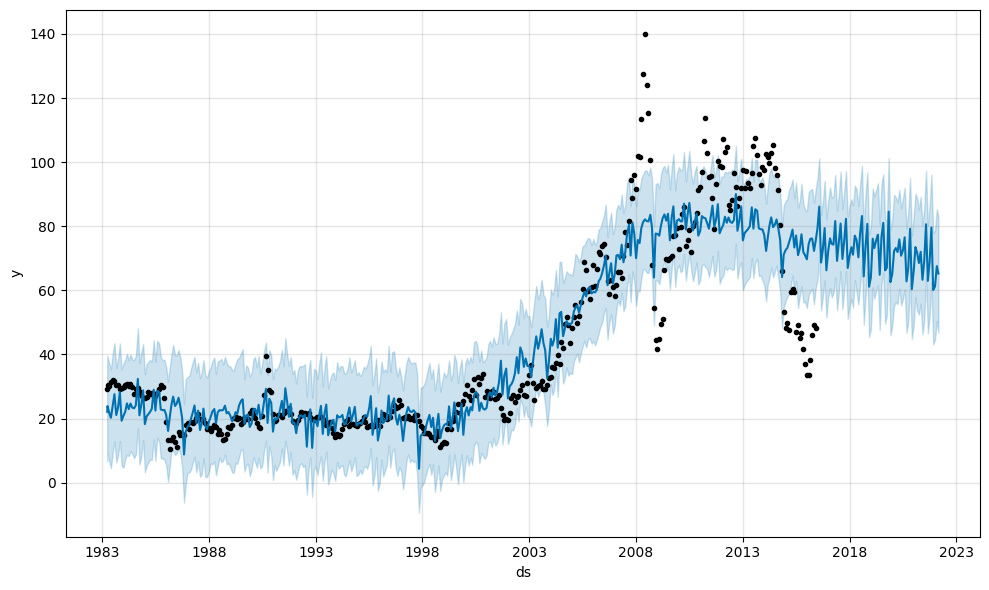

In [332]:
fig1 = m.plot(forecast)

#### Prophet forecast components

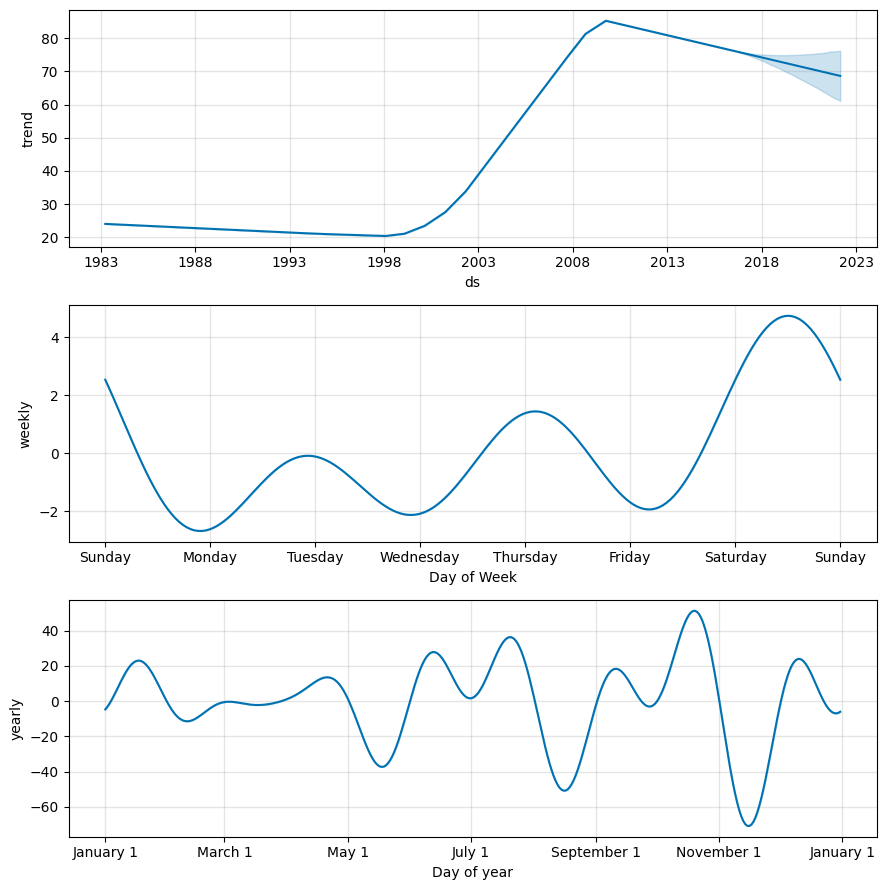

In [333]:
fig2 = m.plot_components(forecast)

#### Forecasting plot for prophet

In [334]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [335]:
plot_components_plotly(m, forecast)

#### rmse of prophet method

In [336]:
prmse=np.sqrt(mean_squared_error(PTST['y'],forecast.iloc[400:,1]))

In [337]:
prmse

21.98971002828178

In [338]:
len(PTST)

69

In [339]:
len(forecast)

469

In [340]:
help(Prophet.fit)

Help on function fit in module prophet.forecaster:

fit(self, df, **kwargs)
    Fit the Prophet model.
    
    This sets self.params to contain the fitted model parameters. It is a
    dictionary parameter names as keys and the following items:
        k (Mx1 array): M posterior samples of the initial slope.
        m (Mx1 array): The initial intercept.
        delta (MxN array): The slope change at each of N changepoints.
        beta (MxK matrix): Coefficients for K seasonality features.
        sigma_obs (Mx1 array): Noise level.
    Note that M=1 if MAP estimation.
    
    Parameters
    ----------
    df: pd.DataFrame containing the history. Must have columns ds (date
        type) and y, the time series. If self.growth is 'logistic', then
        df must also have a column cap that specifies the capacity at
        each ds.
    kwargs: Additional arguments passed to the optimizing or sampling
        functions in Stan.
    
    Returns
    -------
    The fitted Prophet object.

## RMSE DataFrame

In [341]:
Model_Performance=pd.DataFrame(columns=["Method","RMSE"])
Model_Performance["Method"]=["ARIMA","AR","MA","ARMA","NAIVE","Linear Regression Model","Exponential Model","Quadratic Model","Additive_seasonality",
                            "Multiplicative_seasonality","Multiplicative additive seasonality","simple exp smoothing","Double exponential method(Holt method)",
                            "Holtwinter Additive trend and additive seasonality","HW Additive trend and multiplicative seasonality","HW Mult trend and Mult seasonality","LSTM","prophet"]
Model_Performance["RMSE"]=[ARIMA_rmse,AR_rmse,MA_rmse,ARMA_rmse,Naive_rmse,rmse_linear,rmse_exp,rmse_qd,rmse_add_sea,rmse_mul,rmse_mul_ad,rmse_ses,rmse_hw,
                          rmse_hwadd,rmse_hwmul,rmse_hwmulmul,trainScore,prmse]
#Model_Performance["MSE"]=[ARIMA_mse,AR_mse,MA_mse,ARMA_mse,Naive_mse]
Model_Performance.sort_values(by=[ "RMSE"], ascending=[True], inplace=True)

In [342]:
Model_Performance.reset_index(drop=True,inplace=True)

In [343]:
Model_Performance

Method       RMSE
0                                               NAIVE   6.214838
1                                                  MA   9.846423
2                                                  AR  14.381126
3              Double exponential method(Holt method)  14.426257
4                                simple exp smoothing  15.880655
5   Holtwinter Additive trend and additive seasona...  17.261019
6    HW Additive trend and multiplicative seasonality  17.642142
7                                                ARMA  17.843433
8                                Additive_seasonality  21.483534
9                                             prophet  21.989710
10                 HW Mult trend and Mult seasonality  22.824322
11                         Multiplicative_seasonality  27.968179
12                                              ARIMA  29.752450
13                            Linear Regression Model  30.040374
14                                  Exponential Model  36.954759
15                Multiplicative additive seasonality  39.893039
16                                               LSTM  43.834308
17                                    Quadratic Model  51.876630

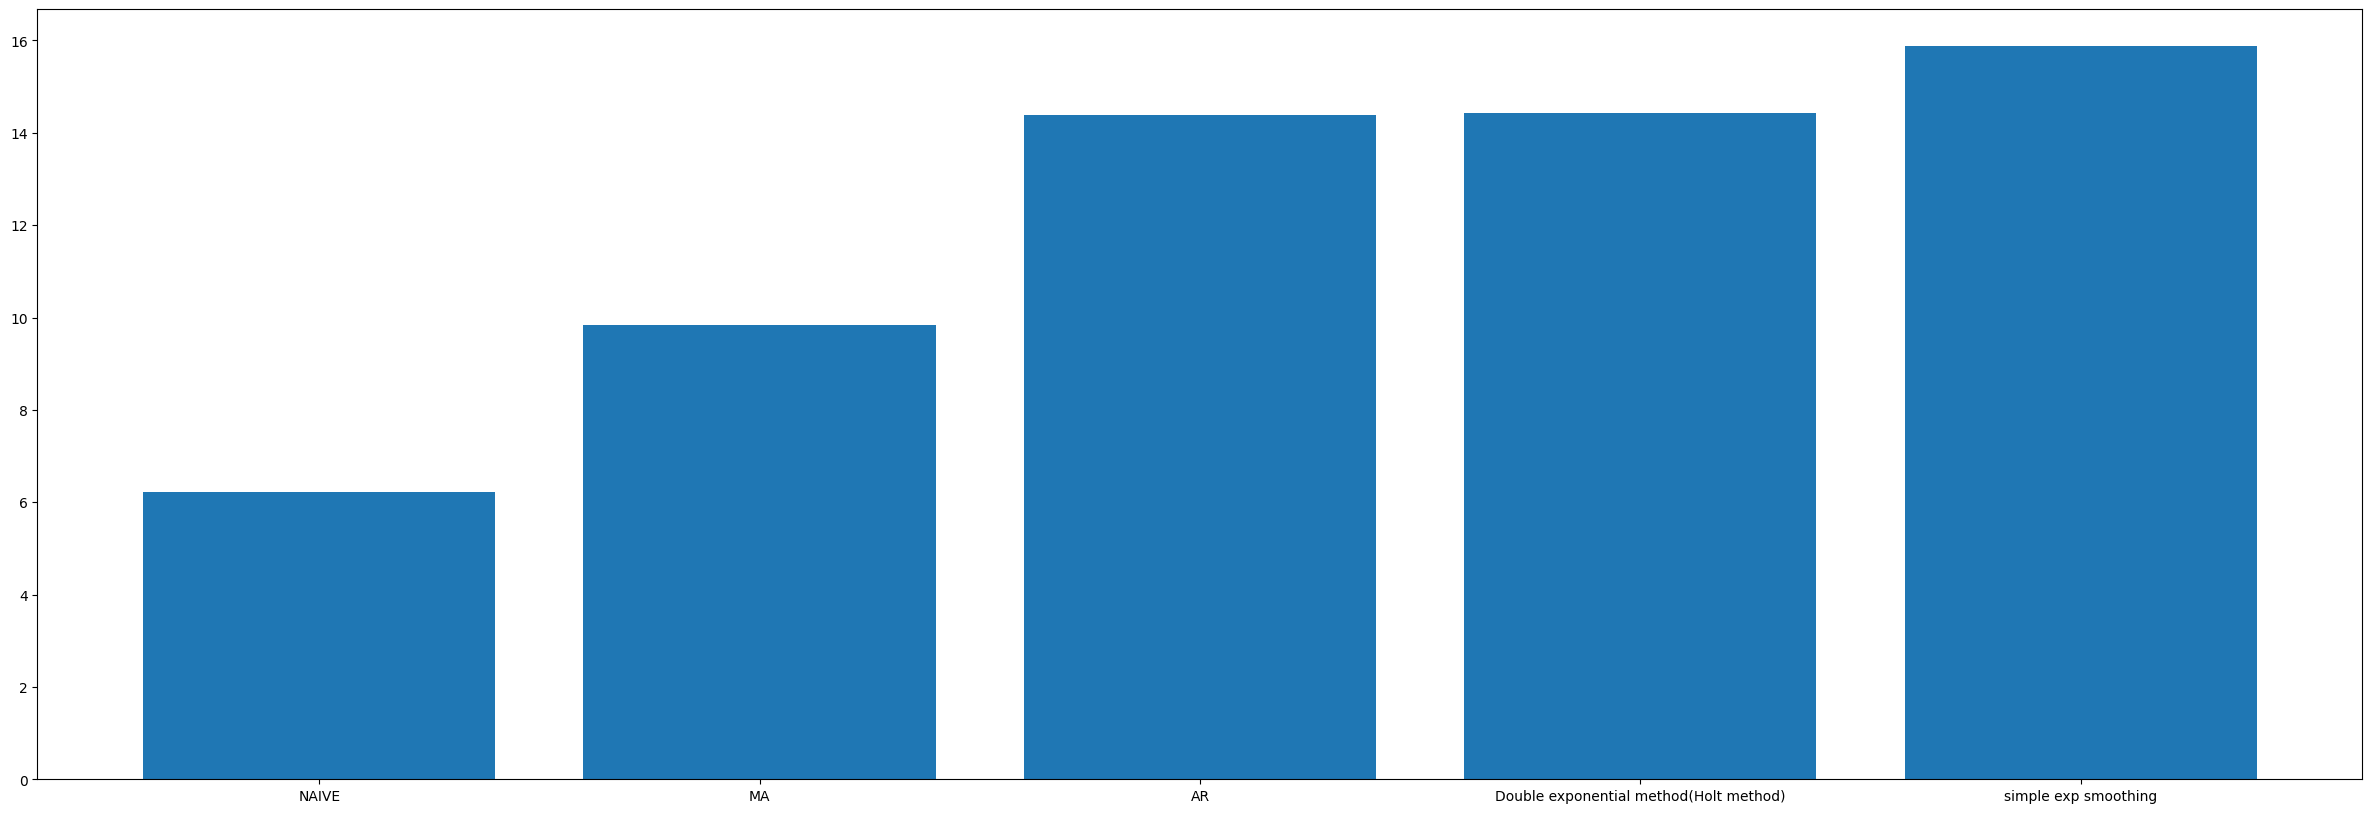

In [344]:
plt.figure(figsize=(30,10))
plt.bar(Model_Performance['Method'].head(5),Model_Performance['RMSE'].head(5))
plt.show()

## Prediction Plot

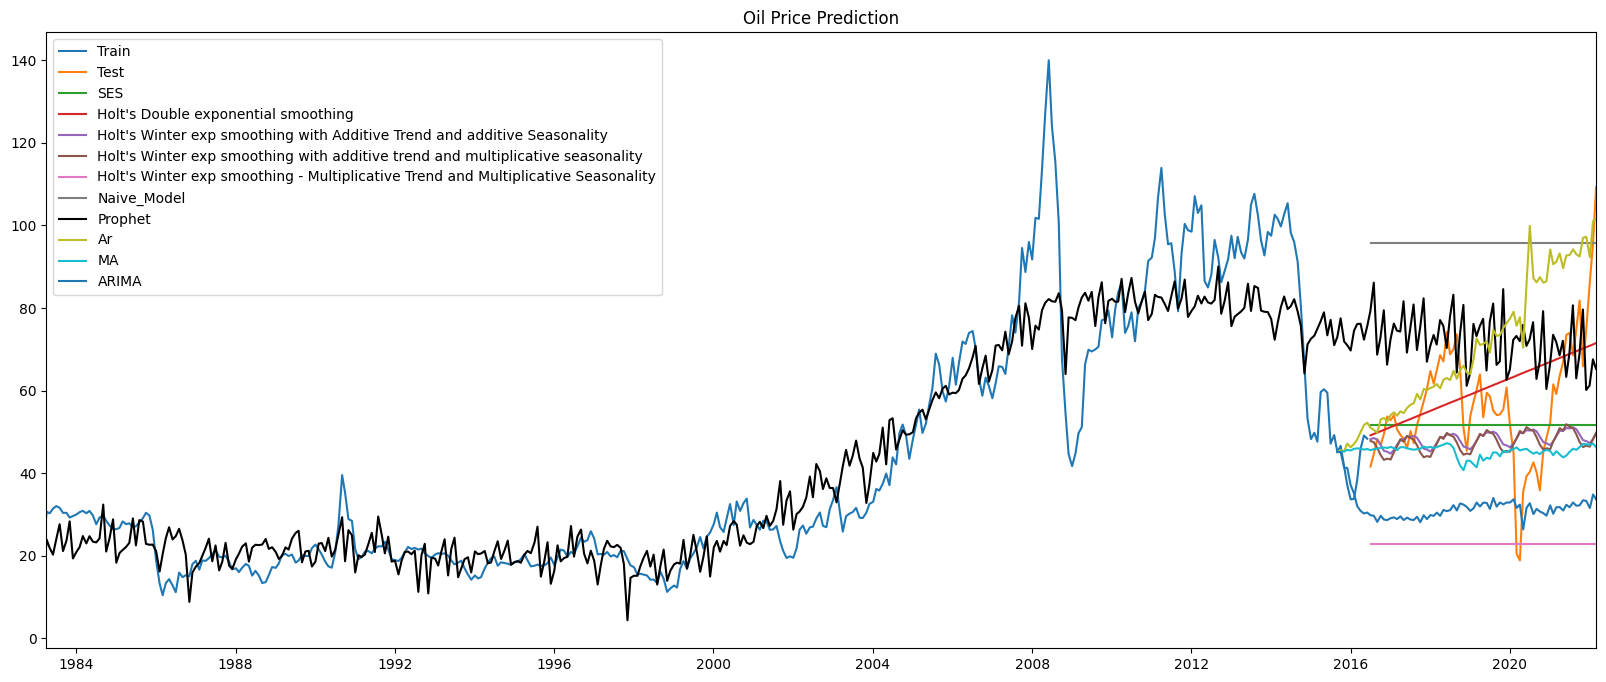

In [345]:
plt.figure(figsize=(20,8))
plt.title("Oil Price Prediction")
plt.plot(Train["price"],label="Train")
plt.plot(Test["price"],label="Test")

plt.plot(pred_sesdf['price'],label="SES")
plt.plot(pred_hwdf['price'],label="Holt's Double exponential smoothing")
plt.plot(pred_hwadddf['price'],label="Holt's Winter exp smoothing with Additive Trend and additive Seasonality ")
plt.plot(pred_hwmuldf['price'],label="Holt's Winter exp smoothing with additive trend and multiplicative seasonality")
plt.plot(rmse_hwmulmuldf['price'],label="Holt's Winter exp smoothing - Multiplicative Trend and Multiplicative Seasonality")
plt.plot(Test['naive_forecast'],label="Naive_Model")
plt.plot( forecast["ds"],forecast["yhat"], label="Prophet", c="k")
plt.plot(Tst['AR'],label='Ar')
plt.plot(Tst['MA'],label='MA')
plt.plot(Tst['Arima'],label='ARIMA')
plt.xlim(Train["price"].index.min(),Test["price"].index.max())

plt.legend(loc="best")

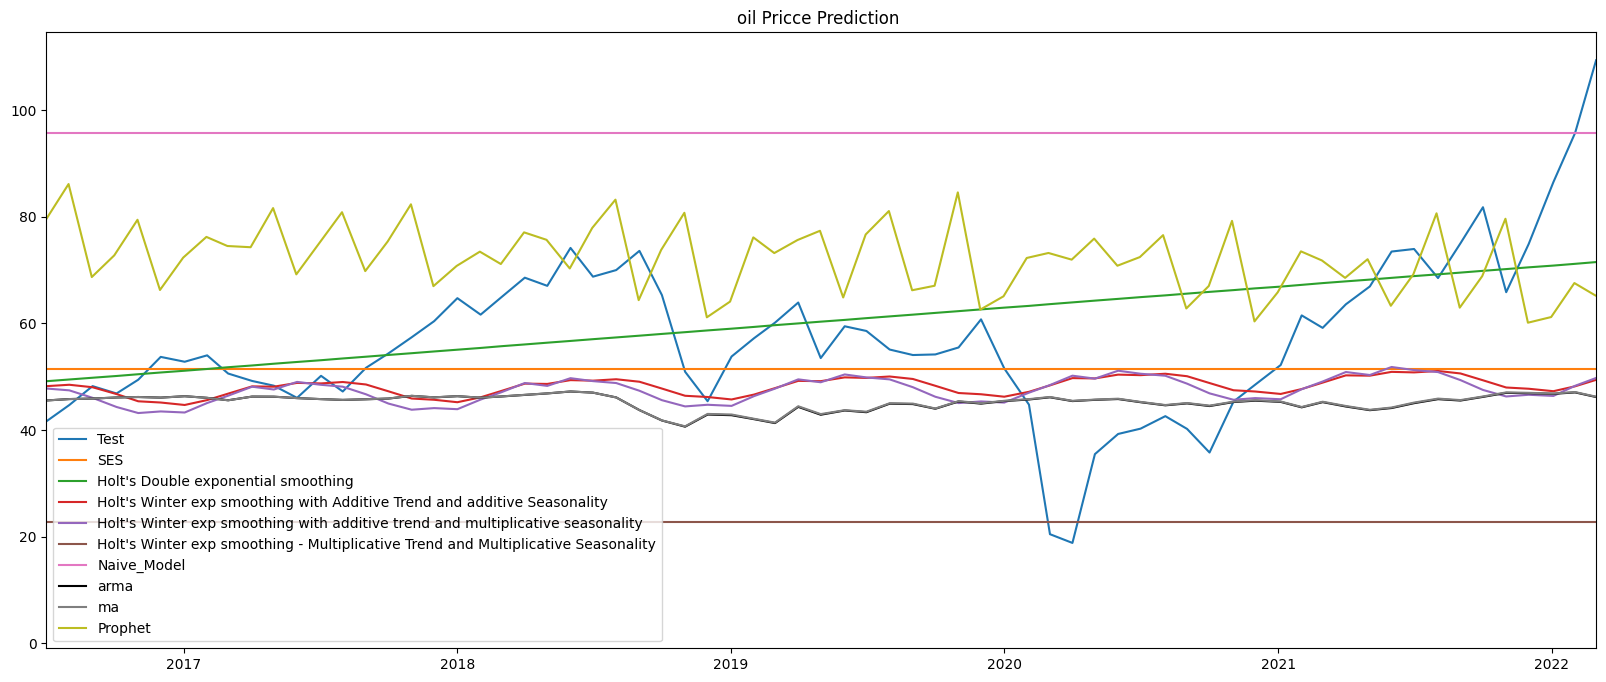

In [346]:
plt.figure(figsize=(20,8))
plt.title("oil Pricce Prediction ")
#plt.plot(Train["price"],label="Train")
plt.plot(Test["price"],label="Test")


plt.plot(pred_sesdf['price'],label="SES")
plt.plot(pred_hwdf['price'],label="Holt's Double exponential smoothing")
plt.plot(pred_hwadddf['price'],label="Holt's Winter exp smoothing with Additive Trend and additive Seasonality ")
plt.plot(pred_hwmuldf['price'],label="Holt's Winter exp smoothing with additive trend and multiplicative seasonality")
plt.plot(rmse_hwmulmuldf['price'],label="Holt's Winter exp smoothing - Multiplicative Trend and Multiplicative Seasonality")
plt.plot(Test['naive_forecast'],label="Naive_Model")
plt.plot(Tst['ARMA'],label='arma',c='k')
plt.plot(Tst['MA'],label='ma')
plt.plot(forecast["ds"], forecast["yhat"], label="Prophet")


plt.xlim(Test["price"].index.min(),Test["price"].index.max())
plt.legend(loc="best")

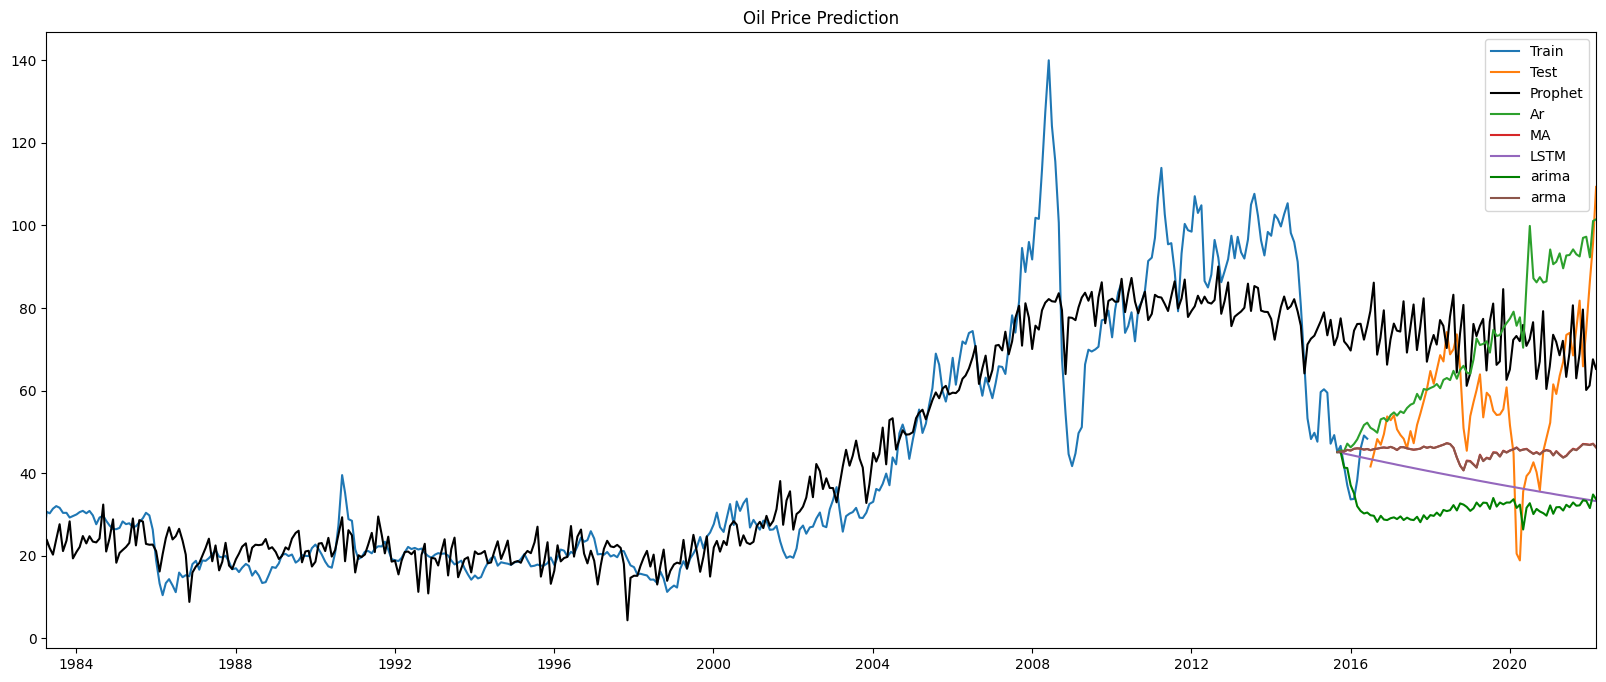

In [347]:
plt.figure(figsize=(20,8))

plt.title("Oil Price Prediction")
plt.plot(Train["price"],label="Train")
plt.plot(Test["price"],label="Test")

plt.plot( forecast["ds"],forecast["yhat"], label="Prophet", c="k")
plt.plot(Tst['AR'],label='Ar')
#plt.plot(Tst['MA'],label='MA',c='r')
plt.plot(Tst['MA'],label='MA')
plt.plot(pred_testpredict['price'],label='LSTM')
plt.plot(Tst['Arima'],label='arima',c='g')
plt.plot(Tst['ARMA'],label='arma')
plt.xlim(Train["price"].index.min(),Test["price"].index.max())

plt.legend(loc="best")

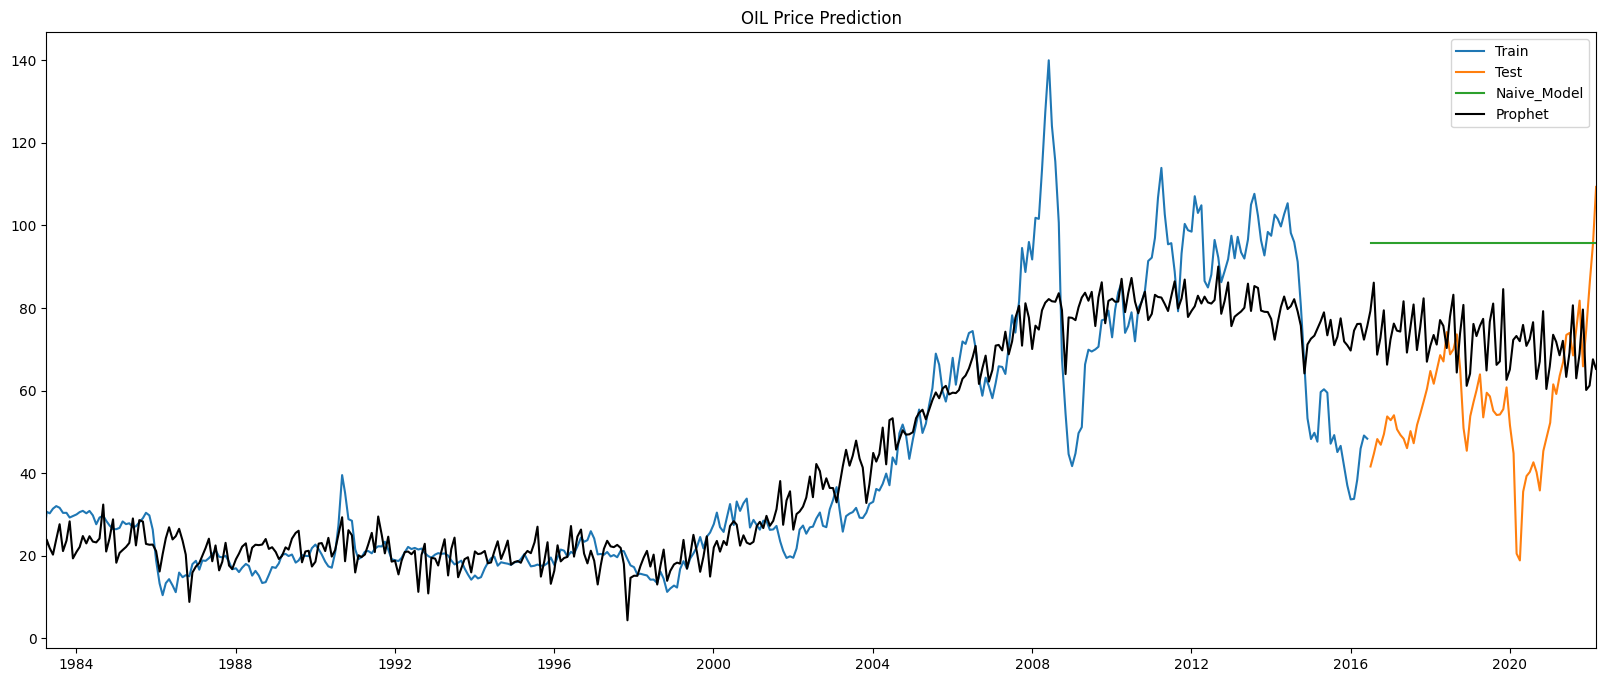

In [348]:
plt.figure(figsize=(20,8))

plt.title("OIL Price Prediction")
plt.plot(Train["price"],label="Train")
plt.plot(Test["price"],label="Test")

plt.plot(Test['naive_forecast'],label="Naive_Model")
plt.plot( forecast["ds"],forecast["yhat"], label="Prophet", c="k")

plt.xlim(Train["price"].index.min(),Test["price"].index.max())

plt.legend(loc="best")

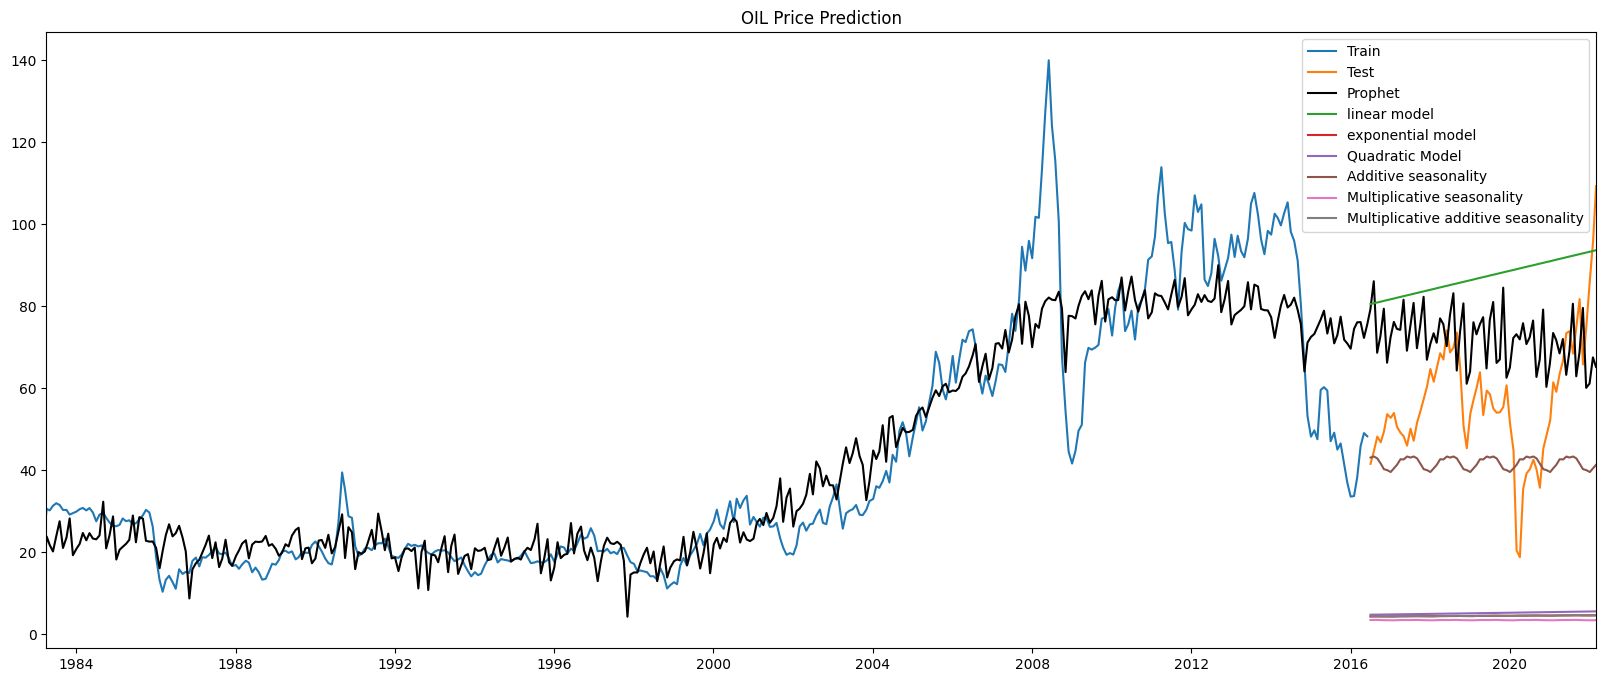

In [349]:
plt.figure(figsize=(20,8))
plt.title("OIL Price Prediction")
plt.plot(Train["price"],label="Train")
plt.plot(Test["price"],label="Test")

plt.plot( forecast["ds"],forecast["yhat"], label="Prophet", c="k")
plt.plot( predlineardf['price'],label='linear model')
plt.plot( predexponentialdf['price'],label='exponential model')
plt.plot(predqddf['price'],label='Quadratic Model')
plt.plot(pred_add_seadf['price'],label='Additive seasonality')
plt.plot(pred_mul_seadf['price'],label='Multiplicative seasonality')
plt.plot(pred_mul_ad_seadf['price'],label='Multiplicative additive seasonality')

plt.xlim(Train["price"].index.min(),Test["price"].index.max())

plt.legend(loc="best")

## CONCLUSION

So  based on above plots we confirmed that Prophet is the best model.(LSTM Model also not much better).After considering the plot and RMSE we can see that Prophet follows good as per graph and RMSE alse even though some other model RMSE less than Prophet we can ignore other model since those are not perfect for forecacsting.

###### Code for Binary coded file creation for streamlit deployment

In [350]:
from pickle import dump

In [351]:
dump(m,open('prophet.pkl','wb'))